In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy_financial as npf 
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

In [92]:
data_invest = pd.read_csv(r'E:\python projects\Datasets\Kenvue\trade_investments.csv')
data_invest.head()

,InvestmentID,StoreID,ProductID,InvestmentType,Amount
0,INV_0001,1036,PROD_020,New Product Listing,"4,131.0500"
1,INV_0002,1044,PROD_021,Marketing Support,"9,028.3100"
2,INV_0003,1167,PROD_033,Shelf Space Optimization,"6,648.6000"
3,INV_0004,1155,PROD_008,Shelf Space Optimization,"8,046.8400"
4,INV_0005,1168,PROD_009,Display Fee,"2,405.8700"


In [93]:
data_invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvestmentID    735 non-null    object 
 1   StoreID         735 non-null    int64  
 2   ProductID       735 non-null    object 
 3   InvestmentType  735 non-null    object 
 4   Amount          735 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 28.8+ KB


In [94]:
data_invest.describe( )

,StoreID,Amount
count,735.0000,735.0000
mean,"1,100.6898","5,266.5201"
std,57.6361,"2,725.2745"
min,"1,001.0000",522.7600
25%,"1,052.5000","2,812.3200"
50%,"1,102.0000","5,338.9800"
75%,"1,152.5000","7,567.0600"
max,"1,200.0000","9,997.0600"


In [95]:
data_invest.isnull().sum()

InvestmentID      0
StoreID           0
ProductID         0
InvestmentType    0
Amount            0
dtype: int64

In [96]:
data_invest['InvestmentType'].value_counts().sort_values(ascending=False)

InvestmentType
Marketing Support           163
Display Fee                 157
New Product Listing         141
Shelf Space Optimization    137
Co-op Advertising           137
Name: count, dtype: int64

In [97]:
total_amount = data_invest['Amount'].sum()
print('the total invested amount is: ', total_amount , 'SAR')

the total invested amount is:  3870892.25 SAR


In [98]:
# Total amount per InvestmentType
investment_totals = data_invest.groupby('InvestmentType')['Amount'].sum()

# Sort descending
investment_totals_sorted = investment_totals.sort_values(ascending=False)

# Calculate percentage of each type from total
investment_percentages = (investment_totals_sorted / investment_totals_sorted.sum()) * 100

# Combine into a single DataFrame for clarity
summary_df = pd.DataFrame({
    'TotalAmount': investment_totals_sorted,
    'Percentage': investment_percentages.round(2)
})

print(summary_df)


                          TotalAmount  Percentage
InvestmentType                                   
Display Fee              883,023.5200     22.8100
Marketing Support        808,653.5700     20.8900
New Product Listing      754,417.2500     19.4900
Shelf Space Optimization 723,835.3500     18.7000
Co-op Advertising        700,962.5600     18.1100


In [99]:
data_invest.groupby('InvestmentType')['Amount'].mean().sort_values(ascending=False)

InvestmentType
Display Fee                5,624.3536
New Product Listing        5,350.4770
Shelf Space Optimization   5,283.4697
Co-op Advertising          5,116.5150
Marketing Support          4,961.0648
Name: Amount, dtype: float64

In [100]:
investment_totals_sorted  = data_invest.groupby('ProductID')['Amount'].sum().sort_values(ascending=False)

Counts = data_invest['ProductID'].value_counts()

# Calculate percentage of each type from total
investment_percentages = (investment_totals_sorted / investment_totals_sorted.sum()) * 100

# Combine into a single DataFrame for clarity
summary_df = pd.DataFrame({
    'Counts': Counts,
    'TotalAmount': investment_totals_sorted,
    'Percentage': investment_percentages.round(2)
})

print(summary_df.sort_values(by='Percentage', ascending=False))

           Counts  TotalAmount  Percentage
ProductID                                 
PROD_045       26 124,199.2900      3.2100
PROD_029       18 108,877.7800      2.8100
PROD_024       22 108,173.6900      2.7900
PROD_021       16 103,488.6300      2.6700
PROD_025       18  96,173.5900      2.4800
PROD_013       16  95,342.6900      2.4600
PROD_005       17  94,716.0700      2.4500
PROD_012       15  92,663.4700      2.3900
PROD_033       19  92,699.2200      2.3900
PROD_050       13  92,437.3000      2.3900
PROD_019       15  91,398.4600      2.3600
PROD_041       17  91,494.2400      2.3600
PROD_046       18  90,992.0900      2.3500
PROD_035       16  90,175.6400      2.3300
PROD_004       16  88,106.9700      2.2800
PROD_038       17  85,879.0600      2.2200
PROD_023       15  86,012.8800      2.2200
PROD_010       17  85,494.5400      2.2100
PROD_016       15  85,328.6900      2.2000
PROD_020       14  85,262.8200      2.2000
PROD_007       15  85,243.4100      2.2000
PROD_008   

In [101]:
# Total amount per StoreID
investment_totals_sorted = data_invest.groupby('StoreID')['Amount'].sum().sort_values(ascending=False)

# Count of transactions per StoreID
Counts = data_invest['StoreID'].value_counts()

# Percentage of each StoreID from total investment
investment_percentages = (investment_totals_sorted / investment_totals_sorted.sum()) * 100

# Combine into a single DataFrame
summary_df = pd.DataFrame({
    'Counts': Counts,
    'TotalAmount': investment_totals_sorted,
    'Percentage': investment_percentages.round(2)
})

# Sort by percentage descending
summary_df_sorted = summary_df.sort_values(by='Percentage', ascending=False)

print(summary_df_sorted)


         Counts  TotalAmount  Percentage
StoreID                                 
1105         10  53,069.7100      1.3700
1104          6  46,534.7800      1.2000
1098          6  45,769.0800      1.1800
1090          8  44,162.8700      1.1400
1084          6  43,898.3700      1.1300
...         ...          ...         ...
1002          1   2,914.9300      0.0800
1041          1   1,865.3500      0.0500
1016          1   2,013.5800      0.0500
1107          1     910.5000      0.0200
1163          1     522.7600      0.0100

[194 rows x 3 columns]


In [102]:
data_store = pd.read_csv(r'E:\python projects\Datasets\Kenvue\stores.csv')
data_store.head()

,StoreID,StoreType,Region,RetailerSize,Retailer
0,1001,Supermarket,Jeddah,Small,Danube
1,1002,Supermarket,Jeddah,Medium,Lulu
2,1003,Supermarket,Jeddah,Small,Danube
3,1004,Pharmacy,Dammam,Small,Watsons
4,1005,Hypermarket,Jeddah,E-commerce,Hyper Panda


In [103]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   StoreID       200 non-null    int64 
 1   StoreType     200 non-null    object
 2   Region        200 non-null    object
 3   RetailerSize  200 non-null    object
 4   Retailer      200 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


In [104]:
data_store.isnull().sum()

StoreID         0
StoreType       0
Region          0
RetailerSize    0
Retailer        0
dtype: int64

In [105]:
data_store['StoreType'].value_counts().sort_values(ascending=False)

StoreType
Pharmacy           63
Supermarket        57
Online Retailer    41
Hypermarket        39
Name: count, dtype: int64

In [106]:
data_store['Retailer'].value_counts().sort_values(ascending=False)

Retailer
Danube         25
Al-Dawaa       25
Amazon         22
Carrefour      22
Noon           19
Watsons        19
Nahdi          19
Lulu           18
Hyper Panda    17
Panda          14
Name: count, dtype: int64

In [107]:
data_store['RetailerSize'].value_counts().sort_values(ascending=False)

RetailerSize
Small         55
Medium        54
E-commerce    50
Large         41
Name: count, dtype: int64

In [108]:
data_store['Region'].value_counts().sort_values(ascending=False)

Region
Jeddah    45
Riyadh    44
Khobar    40
Dammam    36
Mecca     35
Name: count, dtype: int64

In [109]:
data_product = pd.read_csv(r'E:\python projects\Datasets\Kenvue\products.csv')
data_product.head()

,ProductID,Brand,Category,PackSize,COGSPerUnit,LaunchDate
0,PROD_001,Neutrogena,Skincare,500ml,24.8900,2/4/2018
1,PROD_002,Neutrogena,Oral Care,50pcs,28.8900,10/5/2018
2,PROD_003,Neutrogena,Pain Relief,100g,11.4000,2/3/2019
3,PROD_004,Neutrogena,Pain Relief,30ml,33.1300,5/4/2019
4,PROD_005,Neutrogena,Oral Care,100pcs,22.6500,2/14/2019


In [110]:
data_product['LaunchDate'] = pd.to_datetime(data_product['LaunchDate'], format='%m/%d/%Y')

In [111]:
data_product['LaunchDate'].agg(['min', 'max'])

min   2018-01-19
max   2019-12-16
Name: LaunchDate, dtype: datetime64[ns]

In [112]:
data_product['COGSPerUnit'].describe()

count   50.0000
mean    22.2554
std      8.7783
min      5.8300
25%     13.6550
50%     22.9300
75%     28.8850
max     38.2000
Name: COGSPerUnit, dtype: float64

In [113]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ProductID    50 non-null     object        
 1   Brand        50 non-null     object        
 2   Category     50 non-null     object        
 3   PackSize     50 non-null     object        
 4   COGSPerUnit  50 non-null     float64       
 5   LaunchDate   50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.5+ KB


In [114]:
data_product.isnull().sum()

ProductID      0
Brand          0
Category       0
PackSize       0
COGSPerUnit    0
LaunchDate     0
dtype: int64

In [115]:
data_product['Brand'].value_counts().sort_values(ascending=False)

Brand
Neutrogena       13
Listerine        13
Johnson's        10
Clean & Clear     8
Band-Aid          4
Aveeno            2
Name: count, dtype: int64

In [116]:
data_product['Category'].value_counts().sort_values(ascending=False)

Category
Oral Care      13
Pain Relief    13
Skincare       10
Baby Care       9
First Aid       5
Name: count, dtype: int64

In [117]:
data_sales = pd.read_csv(r'E:\python projects\Datasets\Kenvue\main_sales_data.csv')
data_sales.head()

,YearMonth,Region,Channel,StoreID,Retailer,ProductID,Brand,SKU,UnitsSold,ListPrice,...,Returns,PromoFlag,PromoType,PromoDepth,PromoCost,COGS,CompetitorPrice,MarketSharePct,PaymentTermsDays,IsControlStore
0,2023-02,Dammam,Hypermarket,1083,Carrefour,PROD_001,Neutrogena,PROD_001_500ml,439,76.2300,...,418.6600,1,PriceDiscount,0.2300,"6,926.0200","10,926.7100",74.7700,0.3900,90,0
1,2025-02,Jeddah,Supermarket,1039,Panda,PROD_048,Listerine,PROD_048_250ml,490,47.7400,...,384.7100,1,PriceDiscount,0.1200,"2,663.9100","8,927.8000",38.8700,0.3400,30,0
2,2023-11,Dammam,Pharmacy,1117,Nahdi,PROD_043,Neutrogena,PROD_043_100pcs,247,41.6800,...,34.9300,1,BOGO,NaN,"1,622.9200","4,401.5400",37.1100,0.4600,90,0
3,2024-07,Khobar,Online Retailer,1114,Amazon,PROD_029,Listerine,PROD_029_200g,232,61.7100,...,263.9900,0,NaN,NaN,0.0000,"7,906.5600",65.5700,0.1700,30,0
4,2025-06,Dammam,Hypermarket,1051,Hyper Panda,PROD_028,Listerine,PROD_028_500ml,250,59.4900,...,152.0800,1,Digital,NaN,474.2600,"6,380.0000",48.6000,0.2100,90,0


In [118]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YearMonth         50000 non-null  object 
 1   Region            50000 non-null  object 
 2   Channel           50000 non-null  object 
 3   StoreID           50000 non-null  int64  
 4   Retailer          50000 non-null  object 
 5   ProductID         50000 non-null  object 
 6   Brand             50000 non-null  object 
 7   SKU               50000 non-null  object 
 8   UnitsSold         50000 non-null  int64  
 9   ListPrice         50000 non-null  float64
 10  GrossSales        50000 non-null  float64
 11  TradeDiscount     50000 non-null  float64
 12  PromoAllowance    50000 non-null  float64
 13  SlottingFees      50000 non-null  float64
 14  RebateAccrual     50000 non-null  float64
 15  Returns           50000 non-null  float64
 16  PromoFlag         50000 non-null  int64 

In [119]:
data_sales.isnull().sum()

YearMonth               0
Region                  0
Channel                 0
StoreID                 0
Retailer                0
ProductID               0
Brand                   0
SKU                     0
UnitsSold               0
ListPrice               0
GrossSales              0
TradeDiscount           0
PromoAllowance          0
SlottingFees            0
RebateAccrual           0
Returns                 0
PromoFlag               0
PromoType           32523
PromoDepth          42890
PromoCost               0
COGS                    0
CompetitorPrice         0
MarketSharePct          0
PaymentTermsDays        0
IsControlStore          0
dtype: int64

In [120]:
decribe = data_sales.drop(['StoreID','Channel','SKU','Brand','Region','YearMonth','PromoType' ,'Retailer','ProductID', 'PromoFlag', 'IsControlStore'], axis=1).describe(include='all')
decribe

,UnitsSold,ListPrice,GrossSales,TradeDiscount,PromoAllowance,SlottingFees,RebateAccrual,Returns,PromoDepth,PromoCost,COGS,CompetitorPrice,MarketSharePct,PaymentTermsDays
count,"50,000.0000","50,000.0000","50,000.0000","50,000.0000","50,000.0000","50,000.0000","50,000.0000","50,000.0000","7,110.0000","50,000.0000","50,000.0000","50,000.0000","50,000.0000","50,000.0000"
mean,361.8154,55.5562,"20,149.6883","2,016.4079",807.5817,100.0484,604.2667,200.8826,0.2500,905.5346,"8,043.7394",55.5860,0.2758,60.1464
std,310.9199,25.6858,"21,352.8280","2,311.1105","2,478.3052",57.5854,724.7765,272.4005,0.0863,"2,549.3130","8,057.4009",26.7112,0.1300,24.5698
min,10.0000,8.7700,103.6000,8.0200,0.0000,0.0000,2.2500,0.0000,0.1000,0.0000,58.3000,7.1200,0.0500,30.0000
25%,154.0000,34.9900,"6,611.8900",611.2025,0.0000,50.3000,168.1975,39.9075,0.1800,0.0000,"2,790.4200",34.3000,0.1600,30.0000
50%,297.0000,52.6600,"13,796.7850","1,300.1450",0.0000,100.1950,373.4800,110.5900,0.2500,0.0000,"5,654.8800",52.0400,0.2800,60.0000
75%,438.0000,72.6900,"25,634.8950","2,523.1375",560.0775,149.7900,756.9650,252.9025,0.3200,789.0350,"10,402.2100",72.8225,0.3900,90.0000
max,"1,500.0000",133.6900,"193,305.7100","26,846.9300","73,714.8700",199.9900,"8,960.5500","3,778.6000",0.4000,"73,779.9700","57,300.0000",156.7100,0.5000,90.0000


In [121]:
data_sales['YearMonth'] = pd.to_datetime(data_sales['YearMonth'], format='%Y-%m')
data_sales['YearMonth'].agg(['min', 'max'])

print(data_sales['YearMonth'].agg(['min', 'max']))

min   2023-01-01
max   2025-06-01
Name: YearMonth, dtype: datetime64[ns]


In [122]:
percent = (data_sales['TradeDiscount'] / data_sales['GrossSales']) * 100

print(" Average Trade Discount Percentage: ",percent.mean())


totalCOGS = data_sales['COGS'].sum()

print(" Total COGS: ",totalCOGS)

 Average Trade Discount Percentage:  10.003233590345982
 Total COGS:  402186968.52


In [123]:
data_sales['Returns'] = np.ceil(data_sales['Returns'])
data_sales['MarketSharePct'] = data_sales['MarketSharePct'] * 100

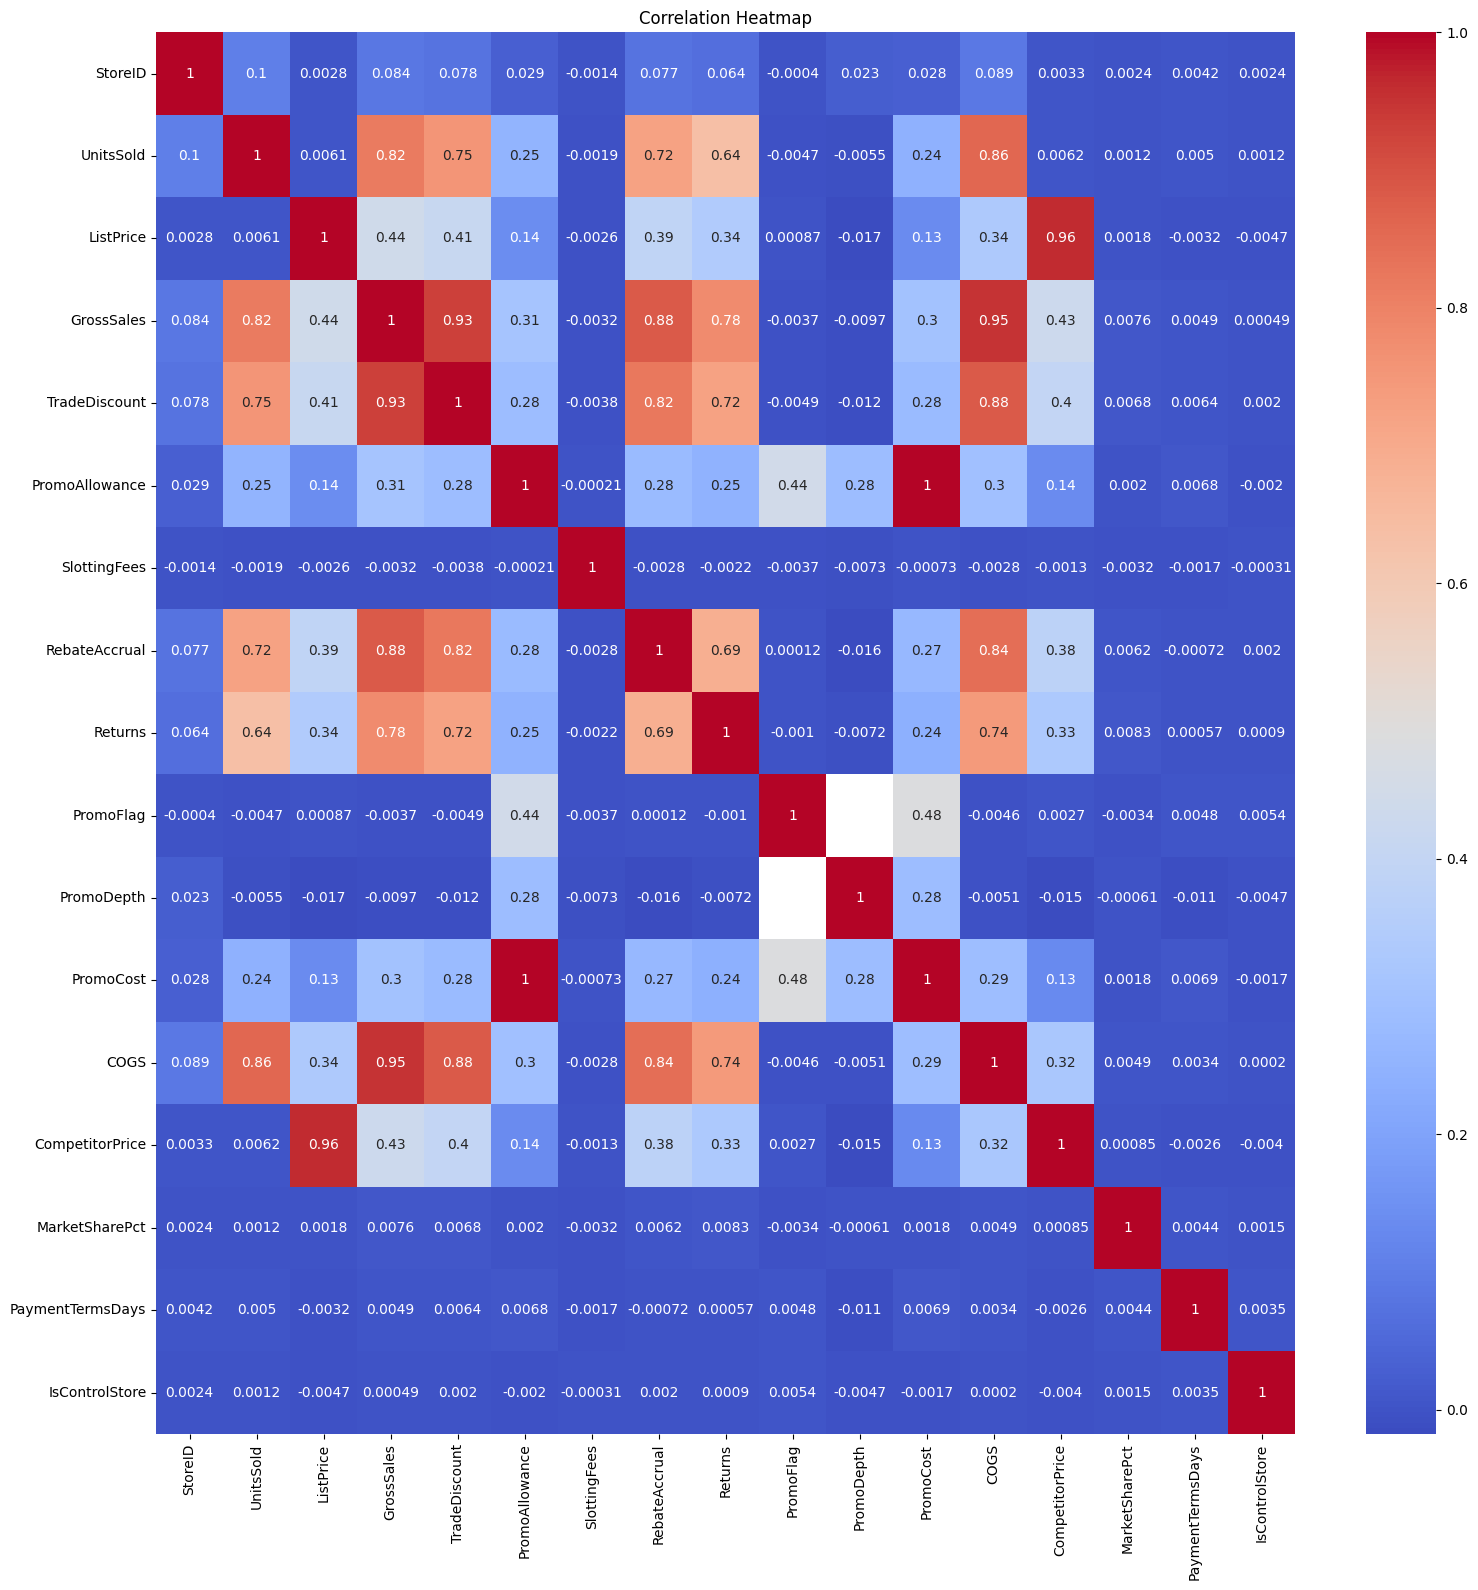

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
sns.heatmap(data_sales.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## 📊 Correlation Heatmap — Key Insights

### **1. 🔗 Strong Positive Correlations**
- **UnitsSold ↔ GrossSales (0.82):** Sales volume directly drives revenue.
- **GrossSales ↔ TradeDiscount (0.93)** and **UnitsSold ↔ TradeDiscount (0.75):** Heavy reliance on discounting to boost volume.
- **ListPrice ↔ CompetitorPrice (0.96):** Strong price alignment with competitors.
- **COGS ↔ GrossSales (0.95)** and **COGS ↔ UnitsSold (0.86):** Costs scale tightly with sales.
- **RebateAccrual ↔ GrossSales (0.88)** and ↔ UnitsSold (0.72):** Rebates grow proportionally with sales commitments.

---

### **2. ⚖️ Moderate Positive Correlations**
- **PromoCost ↔ PromoAllowance (0.44):** Higher budgeted promos tend to cost more.
- **PromoFlag ↔ PromoCost (0.48)** and ↔ PromoAllowance (0.44):** Promotions consistently linked to spend.
- **Returns ↔ UnitsSold (0.64)** and ↔ GrossSales (0.78):** Higher sales volumes drive more returns — potential quality or forecasting issue.

---

### **3. 🧊 Weak or Low Correlations**
- **MarketSharePct:** Weakly correlated with price, discounts, or promotions — suggesting other drivers like distribution or brand equity.
- **IsControlStore:** Near-zero correlation with commercial levers — control stores behave independently.

---

### **4. 🚨 Strategic Red Flags**
- **Sales dependency on Trade Discounts and Rebates** poses margin risk — volume may collapse if incentives are reduced.
- **Returns scaling with volume** could erode net revenue — investigate root causes.
- **Low MarketShare correlation with spend** implies current investments aren’t shifting competitive position effectively.


In [125]:

# 1. Calculate Total Deductions (revenue-related)
data_sales['Total_deductions'] = (
    data_sales['TradeDiscount'] +
    data_sales['PromoAllowance'] +
    data_sales['SlottingFees'] +
    data_sales['RebateAccrual'] +
    data_sales['Returns']
)

# 2. Calculate Net Sales
data_sales['NetSales'] = data_sales['GrossSales'] - data_sales['Total_deductions']

# 3. Calculate Profit (assumes COGS is total, not per unit; adjust if needed)
data_sales['Profit'] = data_sales['NetSales'] - data_sales['COGS']

# 4. Calculate Profit Margin %
data_sales['ProfitMargin'] = round( ((data_sales['Profit'] / data_sales['NetSales']) * 100) , 2)

# 5. Calculate GTN %
data_sales['GTN_Percentage'] = round( ((data_sales['NetSales'] / data_sales['GrossSales']) * 100 ) , 2)

# 6. Share of Promo Allowance in Total Deductions
data_sales['DeductionShare_Promo'] = round(((data_sales['PromoAllowance'] / data_sales['Total_deductions']) * 100), 2)


In [126]:
total_net_sales = data_sales['NetSales'].sum()

print("Total Net Sales:", f"{round(total_net_sales, 2):,}", "SAR")

print("Average GTN Percentage:", round(data_sales['GTN_Percentage'].mean(), 2), "%")


Total Net Sales: 821,000,268.07 SAR
Average GTN Percentage: 79.38 %


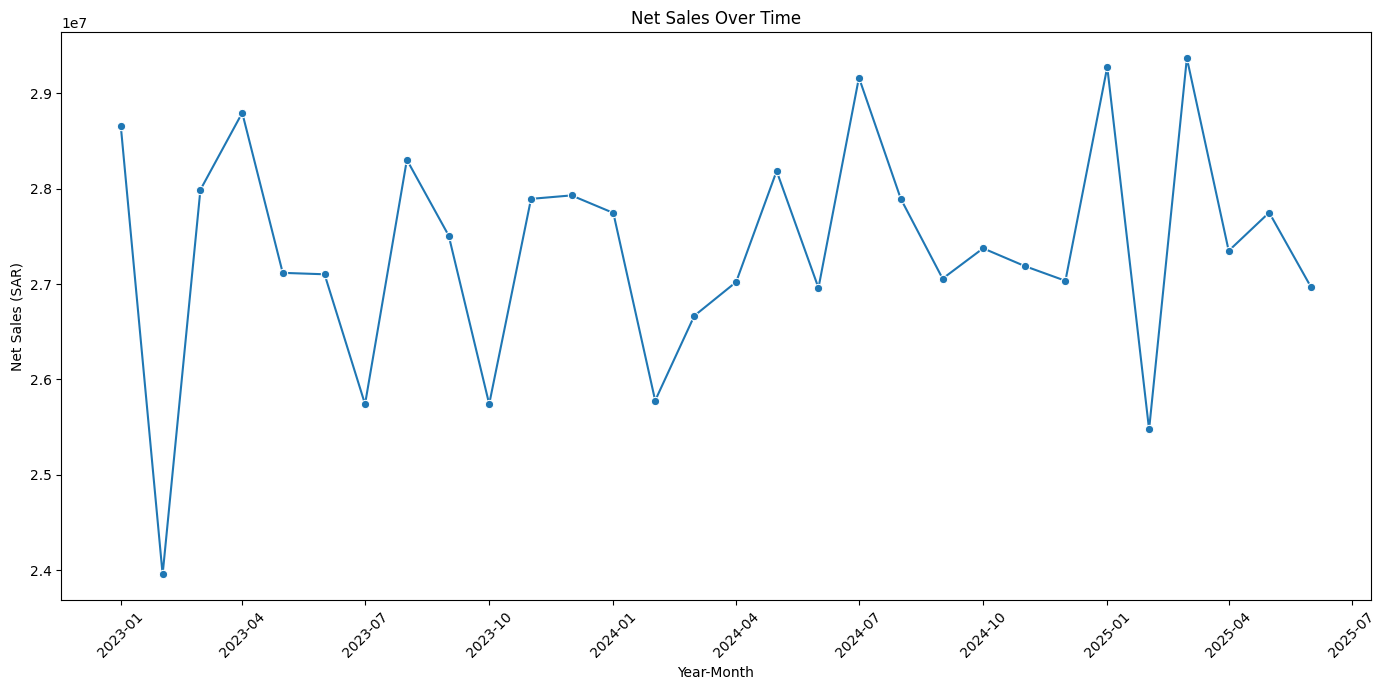

In [127]:
# Line chart: Net Sales over time
monthly_sales = data_sales.groupby('YearMonth')['NetSales'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='YearMonth', y='NetSales', marker='o')
plt.title('Net Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Net Sales (SAR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Net Sales Analysis Over Time 
- Big Decrease in sales in February (2023 , 2024 & 2025)
- increase in sales in January & March (2023 , 2024 & 2025)  & Augest (2023 , 2024) 
- Decrease in sales in July 2023 & October (2023 , 2024 )

In [128]:
Net_Sales_per_Region = data_sales.groupby('Region')['NetSales'].sum().sort_values(ascending=False)

print("Total Net Sales per Region (SAR):")
print(Net_Sales_per_Region.round(2).apply(lambda x: f"{x:,.2f}"))


Total Net Sales per Region (SAR):
Region
Jeddah    197,728,339.80
Riyadh    171,686,625.62
Khobar    170,843,263.20
Mecca     143,112,668.18
Dammam    137,629,371.27
Name: NetSales, dtype: object


In [129]:
# Step 1: Calculate Net Sales
data_sales['NetSales'] = data_sales['GrossSales'] - data_sales['TradeDiscount'] - data_sales['PromoAllowance'] - data_sales['Returns']

# Step 2: Aggregate by YearMonth
monthly_sales = data_sales.groupby('YearMonth')['NetSales'].sum().reset_index()

# Step 3: Convert YearMonth to datetime and sort
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['YearMonth'])
monthly_sales = monthly_sales.sort_values('YearMonth')

# Step 4: Calculate YoY Net Sales (SAR) and YoY %
monthly_sales['NetSales_YoY'] = monthly_sales['NetSales'].shift(12)
monthly_sales['YoY_%'] = ((monthly_sales['NetSales'] - monthly_sales['NetSales_YoY']) / monthly_sales['NetSales_YoY']) * 100

# Step 5: View results
print(monthly_sales)


    YearMonth        NetSales    NetSales_YoY   YoY_%
0  2023-01-01 29,875,869.1300             NaN     NaN
1  2023-02-01 24,998,052.4600             NaN     NaN
2  2023-03-01 29,173,908.9700             NaN     NaN
3  2023-04-01 30,025,118.2800             NaN     NaN
4  2023-05-01 28,278,014.3900             NaN     NaN
5  2023-06-01 28,265,469.0400             NaN     NaN
6  2023-07-01 26,842,582.4700             NaN     NaN
7  2023-08-01 29,521,166.5000             NaN     NaN
8  2023-09-01 28,680,205.0500             NaN     NaN
9  2023-10-01 26,852,644.9700             NaN     NaN
10 2023-11-01 29,094,235.8000             NaN     NaN
11 2023-12-01 29,145,496.8500             NaN     NaN
12 2024-01-01 28,927,314.7400 29,875,869.1300 -3.1750
13 2024-02-01 26,870,361.9700 24,998,052.4600  7.4898
14 2024-03-01 27,854,639.2800 29,173,908.9700 -4.5221
15 2024-04-01 28,166,899.3600 30,025,118.2800 -6.1889
16 2024-05-01 29,393,899.6700 28,278,014.3900  3.9461
17 2024-06-01 28,123,555.400

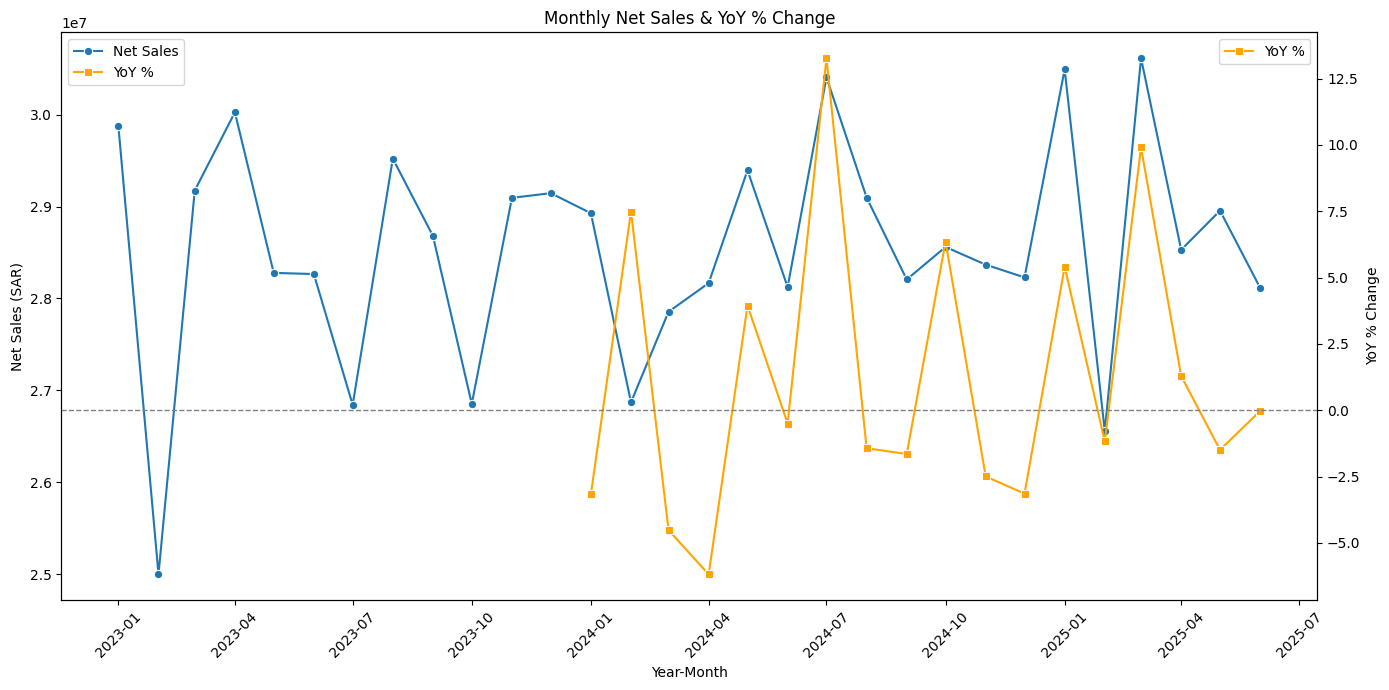

In [130]:

# Step 3: Plot Net Sales and YoY % on dual-axis chart
fig, ax1 = plt.subplots(figsize=(14,7))

# Line for Net Sales
sns.lineplot(data=monthly_sales, x='YearMonth', y='NetSales', marker='o', ax=ax1, label='Net Sales')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Net Sales (SAR)')
ax1.tick_params(axis='x', rotation=45)

# Secondary axis for YoY %
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='YearMonth', y='YoY_%', marker='s', color='orange', ax=ax2, label='YoY %')
ax2.set_ylabel('YoY % Change')
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Monthly Net Sales & YoY % Change')
plt.tight_layout()
plt.show()


### **1. Seasonal Trends**

* Net Sales fluctuate month-to-month in 2023, ranging from **26.85M SAR (Oct 2023)** to **30.03M SAR (Apr 2023)**.
* Peaks occur in **March–April** and **November–December**, which may indicate seasonal demand increases.
* The lowest months are generally **July and October**, possibly reflecting slower sales periods.

### **2. Year-over-Year (YoY) Performance**

* **January 2024:** Net Sales decreased slightly compared to January 2023 by **-3.18%**, from 29.88M to 28.93M SAR.
* **February 2024:** Sales increased significantly by **7.49%** YoY, from 25.0M to 26.87M SAR.
* **March 2024:** Sales decreased by **-4.52%** YoY, from 29.17M to 27.85M SAR.

> The YoY % changes indicate that sales are **volatile**, with alternating months of growth and decline, suggesting **market sensitivity or promotional impact**.

### **3. Overall Observation**

* While total Net Sales are generally stable around **28–30M SAR per month**, the YoY % shows that certain months experience **slight declines**, possibly due to **pricing, competition, or reduced promotional activity**.
* **February 2024** stands out as a strong growth month, suggesting successful **sales initiatives or seasonal demand**.

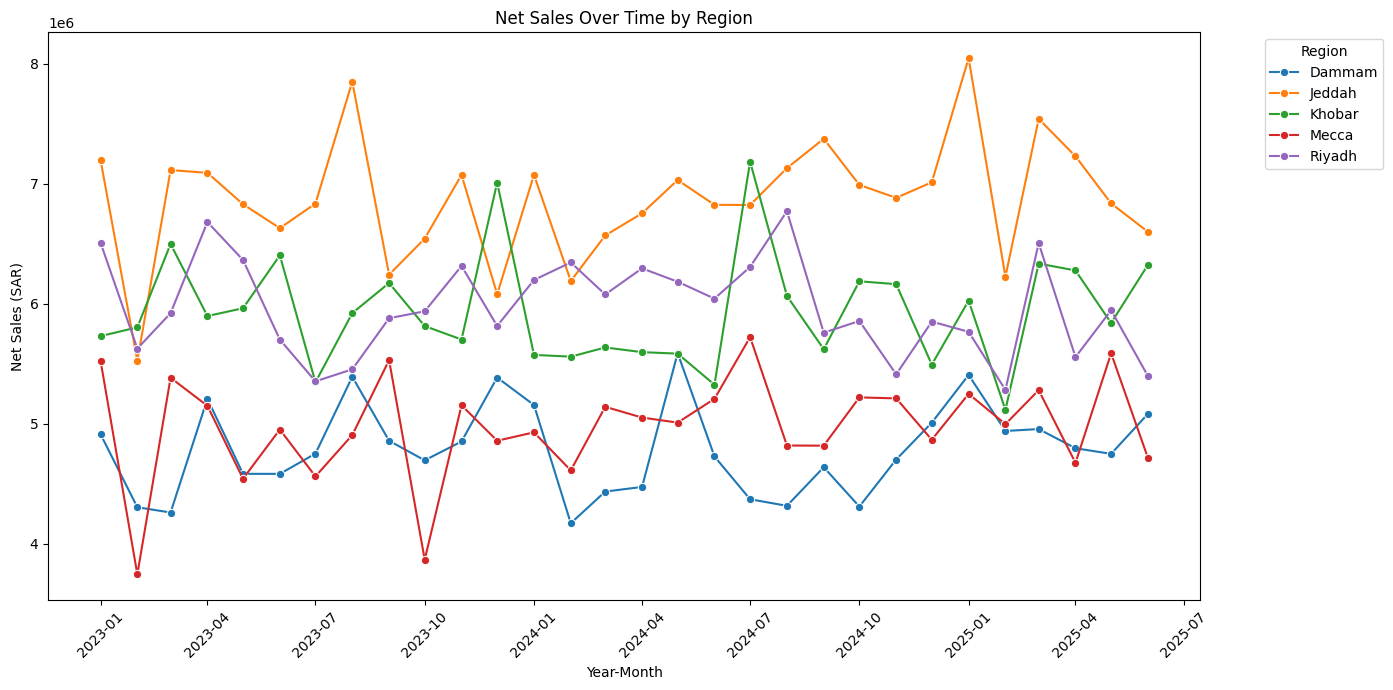

In [131]:
# Line chart: NetSales per Region over time
region_monthly_sales = data_sales.groupby(['Region', 'YearMonth'])['NetSales'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=region_monthly_sales, x='YearMonth', y='NetSales', hue='Region', marker='o')
plt.title('Net Sales Over Time by Region')
plt.xlabel('Year-Month')
plt.ylabel('Net Sales (SAR)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Net Sales per Region over time
- Big Decrease in sales in February (2023 "All regions Except Khobar" , 2024 ""All regions Except Khobar & Riyadh" & 2025 "All regions ")
- increase in sales in January & March (2023 , 2024 & 2025)  & Augest (2023 , 2024)  "Jan 2023 All regions" - "March 2023 All regions Except Dammam" - "Augest 2023 All regions Specially in Jeddah" - "Jan 2024 Jeddah" - "March 2024 All regions increased Slightly Except Riyadh" - "Augest 2024 Riyadh & Jeddah" - "Jan 2025 All regions increased Specially Jeddah , Except Riyadh" - "March 2025 All regions increased  Riyadh , Jeddah & Khobar"
- Decrease in sales in September & October (2023 , 2024 )  - "September 2023 Jeddah & Dammam" - "October 2023 Mainly Mecca" - "September 2024 Riyadh, Khobar & Jeddah" - "October 2024 Jeddah & Dammam Slightly Decreased "
- Decrease in sales in July 2023   - "July 2023 Mainly Khobar" 

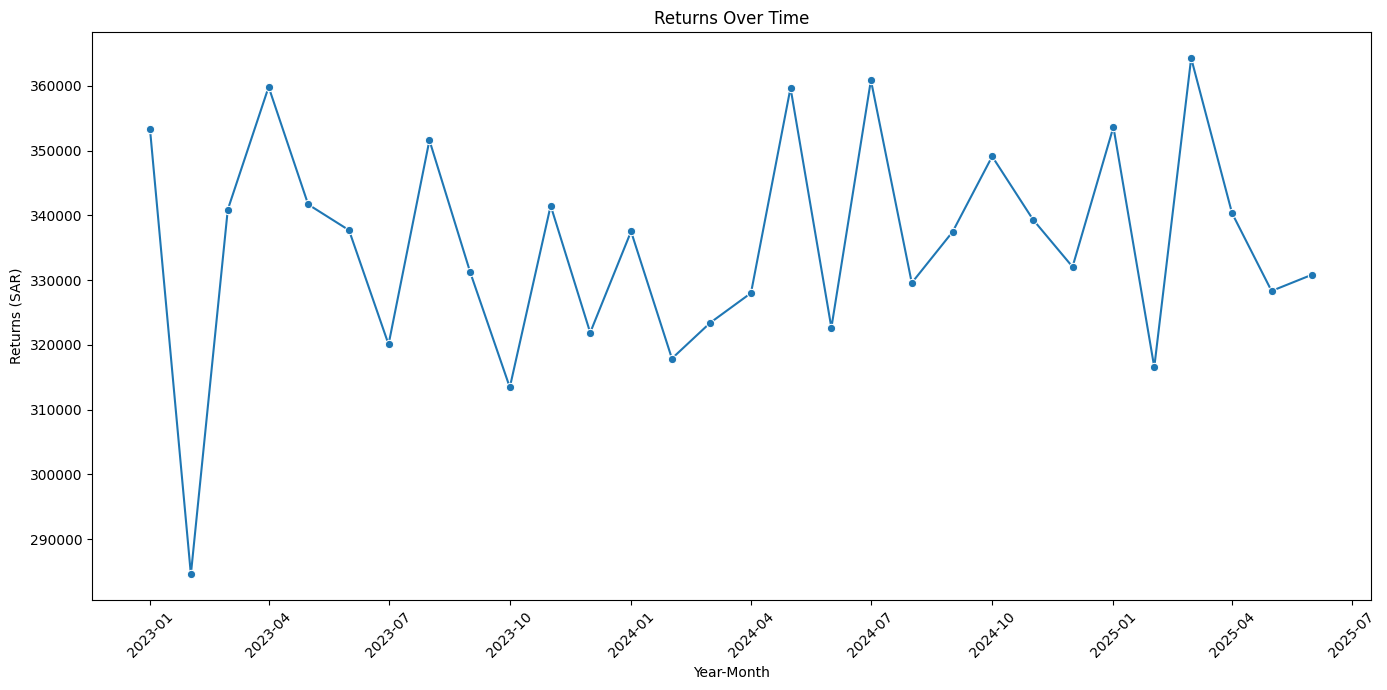

In [132]:
# Line chart: Returns over time
monthly_sales = data_sales.groupby('YearMonth')['Returns'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Returns', marker='o')
plt.title('Returns Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Returns (SAR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Returns Analysis Over Time 
- increase in Returns in January , April , Augest & November (2023) 
- increase in Returns in January , May , July & October (2024)
- increase in Returns in January & March (2025)

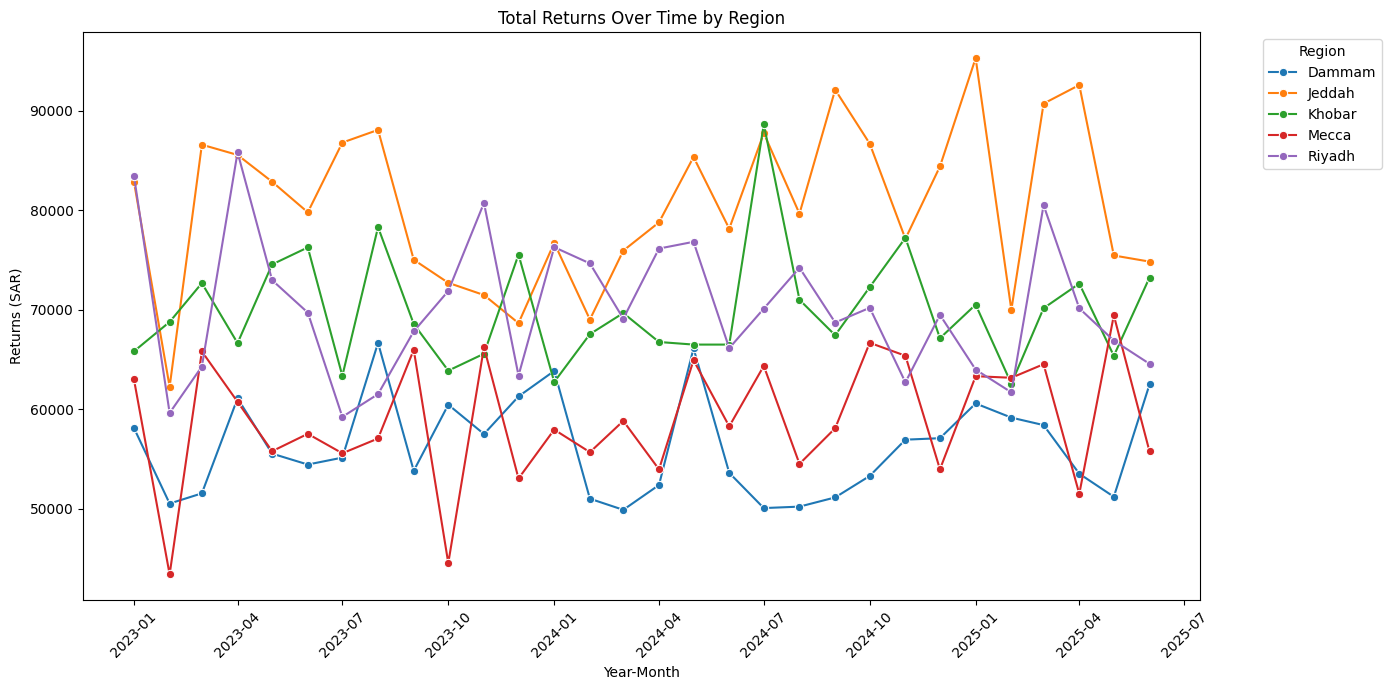

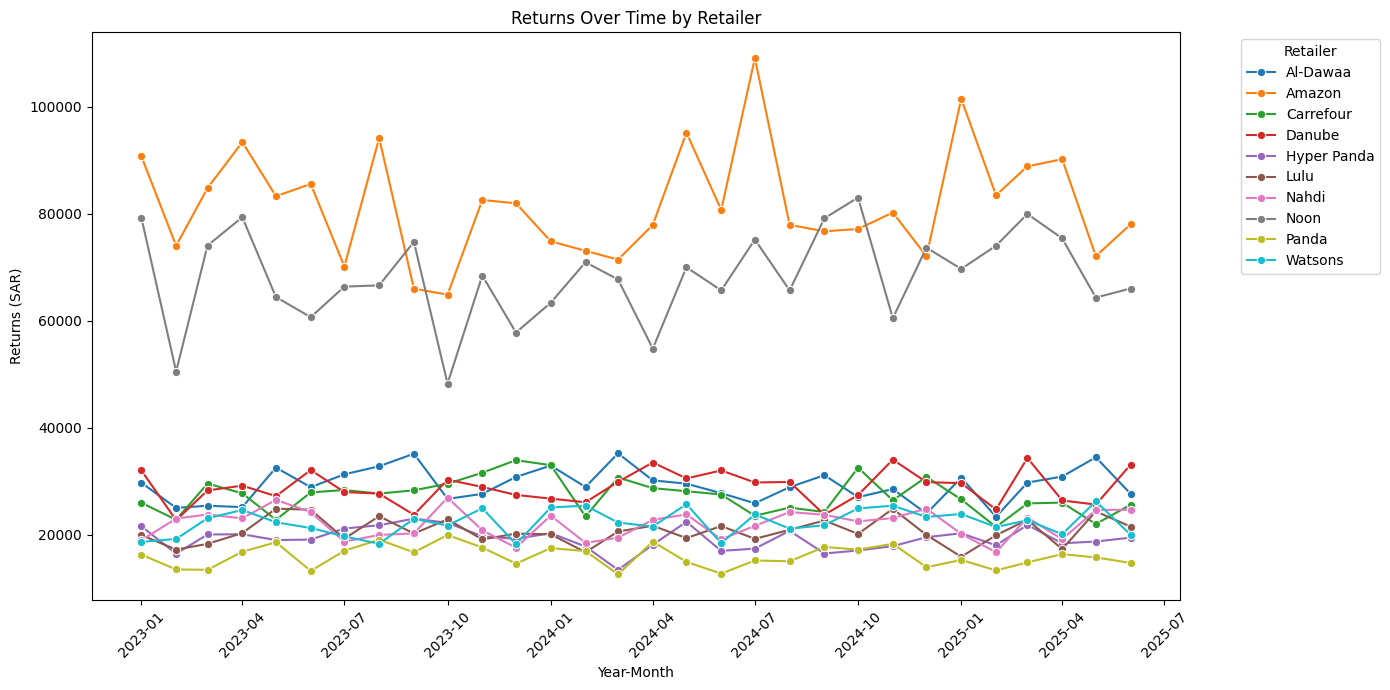

In [133]:
# Line chart: Returns per Region over time
region_monthly_sales = data_sales.groupby(['Region', 'YearMonth'])['Returns'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=region_monthly_sales, x='YearMonth', y='Returns', hue='Region', marker='o')
plt.title('Total Returns Over Time by Region')
plt.xlabel('Year-Month')
plt.ylabel('Returns (SAR)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

retailer_monthly_sales = data_sales.groupby(['Retailer', 'YearMonth'])['Returns'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=retailer_monthly_sales, x='YearMonth', y='Returns', hue='Retailer', marker='o')
plt.title('Returns Over Time by Retailer')
plt.xlabel('Year-Month')
plt.ylabel('Returns (SAR)')
plt.xticks(rotation=45)
plt.legend(title='Retailer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [134]:
Net_Sales_per_Retailer = data_sales.groupby('Retailer')['NetSales'].sum().sort_values(ascending=False)

print("Total Net Sales per Retailer (SAR):")
print(Net_Sales_per_Retailer.round(2).apply(lambda x: f"{x:,.2f}"))


Total Net Sales per Retailer (SAR):
Retailer
Amazon         207,407,966.09
Noon           175,639,953.46
Al-Dawaa        74,740,656.51
Danube          73,662,120.40
Carrefour       68,287,586.78
Watsons         56,508,870.14
Nahdi           56,256,728.33
Lulu            52,707,282.23
Hyper Panda     50,590,769.33
Panda           40,414,088.63
Name: NetSales, dtype: object


- Amazon & Noon are the main retailers With the highest sales Percentage from the total Net Sales ~ 45% Together

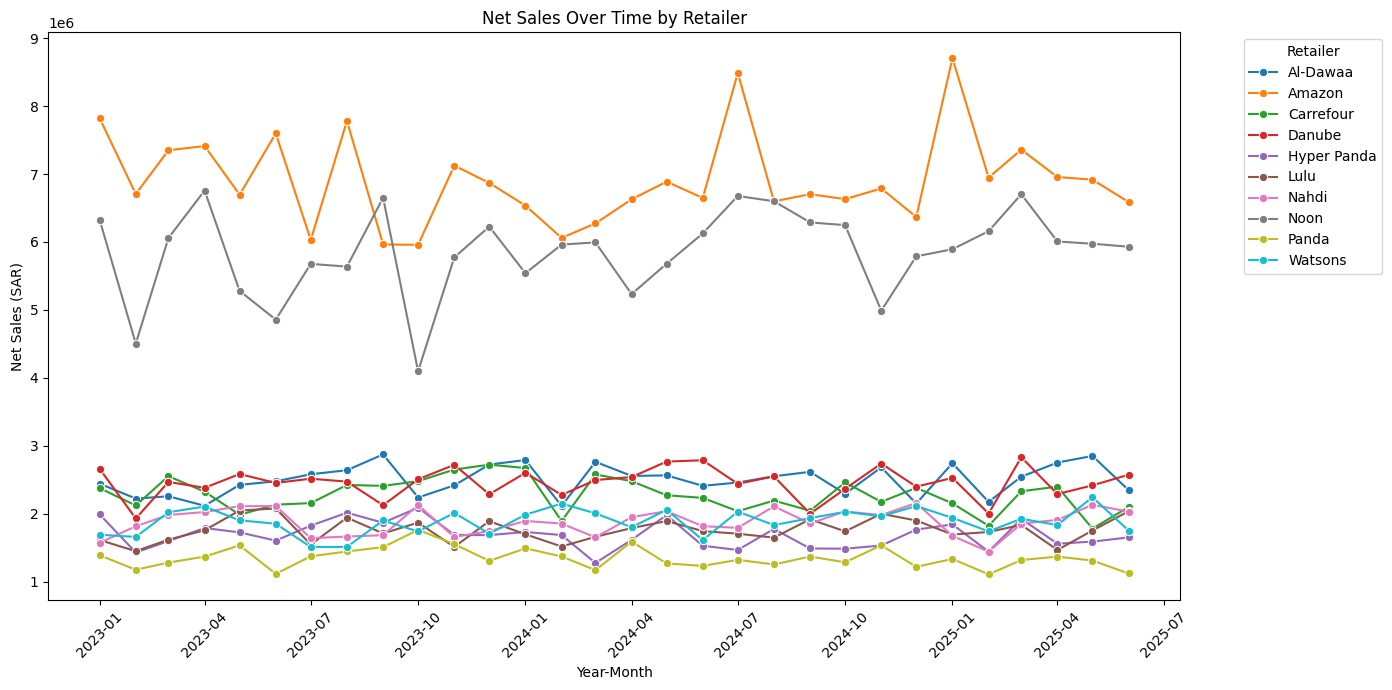

In [135]:
retailer_monthly_sales = data_sales.groupby(['Retailer', 'YearMonth'])['NetSales'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=retailer_monthly_sales, x='YearMonth', y='NetSales', hue='Retailer', marker='o')
plt.title('Net Sales Over Time by Retailer')
plt.xlabel('Year-Month')
plt.ylabel('Net Sales (SAR)')
plt.xticks(rotation=45)
plt.legend(title='Retailer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Net Sales Analysis by Retailer
- Big Decrease in sales in February (2023 "Mainly Noon" , 2024 ""All Retailers Except Watsons & Noon" & 2025 "All Retailers "Mainly Amazon" Except Noon")
- increase in sales in January & March (2023 , 2024 & 2025)  & Augest (2023 , 2024)  "Jan 2023 All Retailers" - "March 2023 All Retialers" - "Augest 2023 Mainly Amazon"  - "March 2024 & Augest 2024 No Main Retailer"  - "Jan 2025 AMainly Amazon" - "March 2025 All Retailers"
- Decrease in sales in July 2023 & October (2023 , 2024 )  - "July 2023 Mainly Amazon" - "October 2023 Mainly Noon" - "September 2024 Danube" 

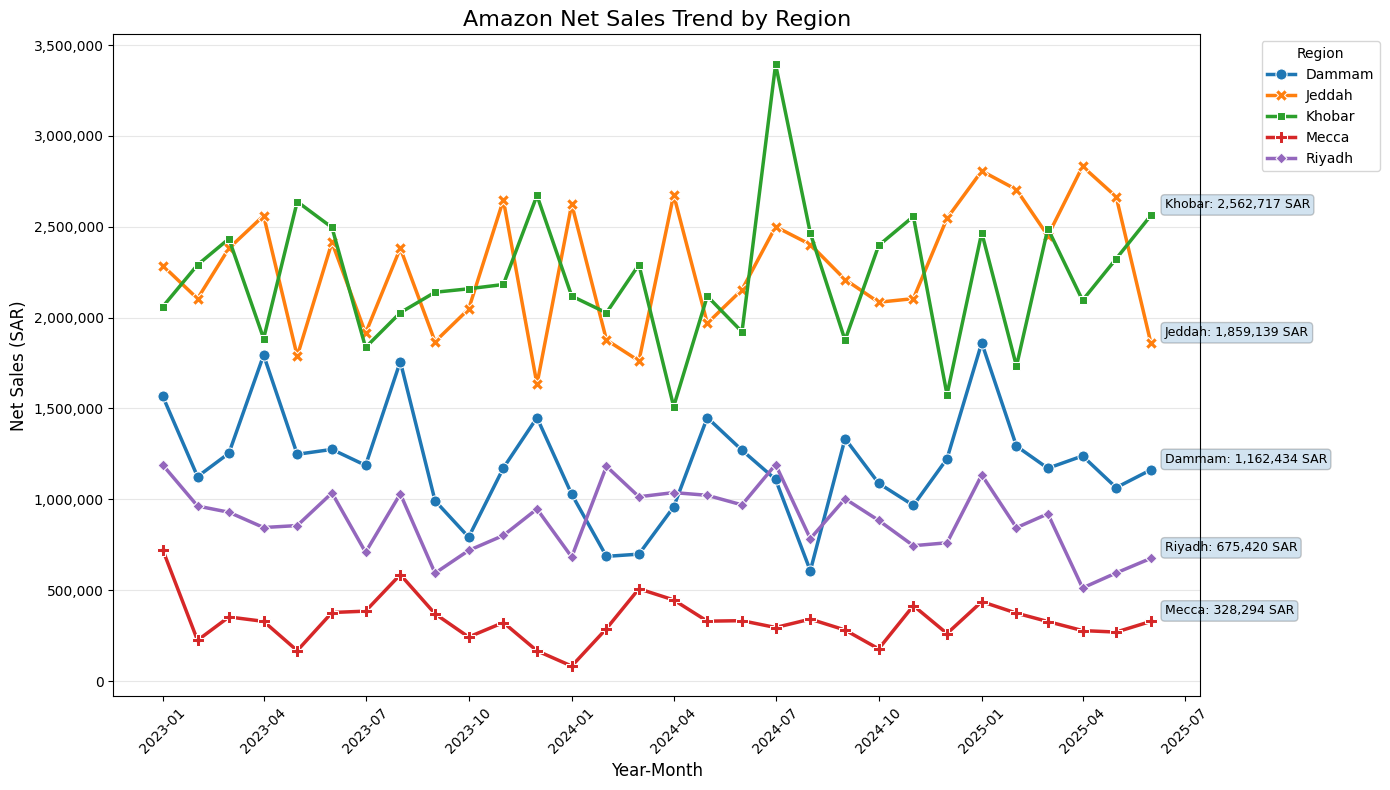

In [136]:
# 1. Filter data for Amazon only
amazon_sales = data_sales[data_sales['Retailer'] == 'Amazon']

# 2. Aggregate net sales by region and month
amazon_region_sales = amazon_sales.groupby(
    ['Region', 'YearMonth']
)['NetSales'].sum().reset_index()

# 3. Convert to datetime and sort
amazon_region_sales['YearMonth'] = pd.to_datetime(amazon_region_sales['YearMonth'])
amazon_region_sales = amazon_region_sales.sort_values(['Region', 'YearMonth'])

# 4. Create visualization
plt.figure(figsize=(14, 8))
ax = sns.lineplot(
    data=amazon_region_sales,
    x='YearMonth',
    y='NetSales',
    hue='Region',
    style='Region',
    markers=True,
    dashes=False,
    markersize=8,
    linewidth=2.5,
    palette='tab10'  # Distinct colors for regions
)

# 5. Formatting
plt.title('Amazon Net Sales Trend by Region', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Net Sales (SAR)', fontsize=12)
plt.xticks(rotation=45)

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))

# 6. Add data labels for last point in each region
regions = amazon_region_sales['Region'].unique()
for region in regions:
    region_data = amazon_region_sales[amazon_region_sales['Region'] == region]
    if not region_data.empty:
        last_point = region_data.iloc[-1]
        plt.annotate(f"{region}: {last_point['NetSales']:,.0f} SAR", 
                    (last_point['YearMonth'], last_point['NetSales']),
                    textcoords="offset points",
                    xytext=(10, 5),
                    ha='left',
                    fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', alpha=0.2))

# 7. Add grid and legend
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Amazon Net Sales by Region
- Big Decrease in sales in February ( 2024 ""Amazon in Dammam & jeddah" & 2025 "Amazon in Dammam & Khobar")
- increase in sales in January & March (2023 , 2024 & 2025)  & Augest (2023 , 2024)   "March 2023 Manily Amazon Jeddah" - "Augest 2023 All Amazon Mainly Dammam , Jeddah & Riyadh"   - "Jan 2025 Mainly Amazon Dammam , jeddah & Khobar" - "March 2025 Amazon Khobar"
- Decrease in sales in July 2023 & October (2023 , 2024 )  - "July 2023 Mainly Amazon Khobar" -"September 2023 Mainly Amazon Dammam"  - "September 2024 Khober" 

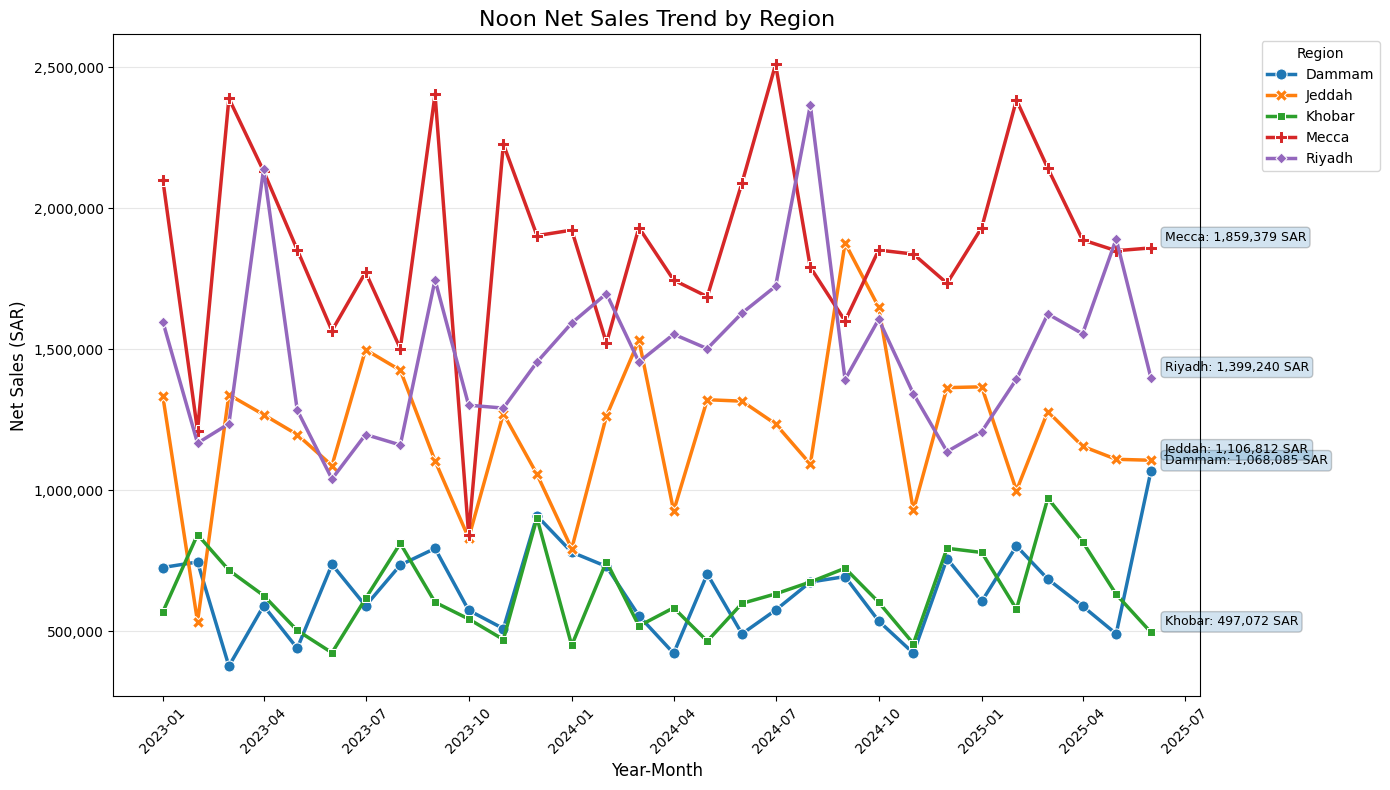

In [137]:
# 1. Filter data for Noon only
Noon_sales = data_sales[data_sales['Retailer'] == 'Noon']

# 2. Aggregate net sales by region and month
Noon_region_sales = Noon_sales.groupby(
    ['Region', 'YearMonth']
)['NetSales'].sum().reset_index()

# 3. Convert to datetime and sort
Noon_region_sales['YearMonth'] = pd.to_datetime(Noon_region_sales['YearMonth'])
Noon_region_sales = Noon_region_sales.sort_values(['Region', 'YearMonth'])

# 4. Create visualization
plt.figure(figsize=(14, 8))
ax = sns.lineplot(
    data=Noon_region_sales,
    x='YearMonth',
    y='NetSales',
    hue='Region',
    style='Region',
    markers=True,
    dashes=False,
    markersize=8,
    linewidth=2.5,
    palette='tab10'  # Distinct colors for regions
)

# 5. Formatting
plt.title('Noon Net Sales Trend by Region', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Net Sales (SAR)', fontsize=12)
plt.xticks(rotation=45)

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))

# 6. Add data labels for last point in each region
regions = Noon_region_sales['Region'].unique()
for region in regions:
    region_data = Noon_region_sales[Noon_region_sales['Region'] == region]
    if not region_data.empty:
        last_point = region_data.iloc[-1]
        plt.annotate(f"{region}: {last_point['NetSales']:,.0f} SAR", 
                    (last_point['YearMonth'], last_point['NetSales']),
                    textcoords="offset points",
                    xytext=(10, 5),
                    ha='left',
                    fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', alpha=0.2))

# 7. Add grid and legend
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Noon Retailer Net Sales Analysis by Region
- Big Decrease in sales in February (2023 "Noon in Riyadh,Jeddah & Mecca" , 2024 "Noon Mecca" & 2025 "All  Noon Jeddah & Khobar")
- increase in sales in January & March (2023 , 2024 & 2025)  & Augest (2023 , 2024)  "Jan 2023 Noon Jeddah, Mecca & Riyadh" - "March 2023 Noon Dammam" - "Augest 2023 Mainly Noon Mecca "  - "Augest 2024 Noon Mecca"  - "March 2025 Noon Khobar, Jeddah & Riyadh"
- Decrease in sales in September & October (2023 , 2024 )  - "September 2023 Noon Jeddah" - "October 2023 All Noon But Mainly Mecca" - "September 2024 Mainly Noon riyadh" 

In [138]:
# SKU Performance Summary Analysis
# ================================

# 1. Aggregate Key Metrics by SKU
# -------------------------------
sku_summary = (
    data_sales
    .groupby('SKU')
    .agg(
        Total_NetSales=('NetSales', 'sum'),
        Total_Profit=('Profit', 'sum'),
        Avg_MarketShare=('MarketSharePct', 'mean')
    )
    .sort_values('Total_NetSales', ascending=False)
)

# 2. Calculate Sales Share Percentage
# -----------------------------------
total_sales = sku_summary['Total_NetSales'].sum()
sku_summary['Sales_Share_Pct'] = (sku_summary['Total_NetSales'] / total_sales) * 100

# 3. Format Results for Display
# -----------------------------
formatted_summary = (
    sku_summary
    .reset_index()
    .assign(
        Formatted_NetSales = lambda x: x['Total_NetSales'].apply(lambda v: f"SAR {v:,.2f}"),
        Formatted_Profit = lambda x: x['Total_Profit'].apply(lambda v: f"SAR {v:,.2f}"),
        Formatted_Share = lambda x: x['Sales_Share_Pct'].apply(lambda v: f"{v:.2f}%"),
        Formatted_MarketShare = lambda x: x['Avg_MarketShare'].apply(lambda v: f"{v:.2f}%")
    )
    [['SKU', 'Formatted_NetSales', 'Formatted_Profit', 
      'Formatted_Share', 'Formatted_MarketShare']]
    .rename(columns={
        'Formatted_NetSales': 'Net Sales',
        'Formatted_Profit': 'Profit',
        'Formatted_Share': 'Sales Share',
        'Formatted_MarketShare': 'Avg Market Share'
    })
)

# 4. Display Results
# ------------------
print("SKU Performance Summary:")
print("=" * 80)
print(formatted_summary.to_string(index=False))



SKU Performance Summary:
            SKU         Net Sales            Profit Sales Share Avg Market Share
  PROD_024_100g SAR 29,491,061.88 SAR 14,727,641.73       3.44%           27.39%
  PROD_025_30ml SAR 29,194,201.83 SAR 14,465,743.49       3.41%           28.05%
 PROD_014_500ml SAR 28,616,744.38 SAR 14,025,130.33       3.34%           28.12%
  PROD_018_200g SAR 27,286,262.94 SAR 13,357,160.51       3.19%           26.86%
  PROD_045_200g SAR 25,790,920.15 SAR 12,705,800.85       3.01%           27.22%
  PROD_004_30ml SAR 25,243,458.55 SAR 12,456,698.68       2.95%           27.86%
  PROD_029_200g SAR 25,006,304.77 SAR 12,231,249.91       2.92%           27.27%
 PROD_017_150ml SAR 24,603,553.89 SAR 12,210,340.69       2.87%           27.62%
 PROD_012_250ml SAR 24,238,307.82 SAR 12,081,604.90       2.83%           26.83%
 PROD_036_50pcs SAR 23,762,011.04 SAR 11,766,993.99       2.78%           28.17%
 PROD_016_500ml SAR 23,734,075.59 SAR 11,638,351.30       2.77%           27.49%
 PR

In [139]:
# Baseline = average MarketSharePct in stable (non-decline) periods
baseline_share = data_sales[data_sales['NetSales'] > data_sales['NetSales'].mean()]['MarketSharePct'].mean()

# Calculate share loss during decline periods
decline_periods = data_sales[data_sales['NetSales'] < data_sales['NetSales'].mean()]
decline_periods['Share_Loss'] = baseline_share - decline_periods['MarketSharePct']

# Group by SKU/Region/Retailer to find biggest competitive threats
share_loss_analysis = decline_periods.groupby(['SKU', 'Region', 'Retailer'])['Share_Loss'].mean().sort_values(ascending=False)
print(share_loss_analysis)


SKU              Region  Retailer 
PROD_001_500ml   Mecca   Amazon       22.6348
                 Dammam  Noon         22.6348
PROD_006_50pcs   Mecca   Panda        21.6348
PROD_018_200g    Dammam  Noon         21.6348
PROD_010_200g    Dammam  Amazon       20.6348
                                       ...   
PROD_008_30ml    Khobar  Watsons     -20.3652
PROD_046_500ml   Jeddah  Carrefour   -21.3652
PROD_028_500ml   Khobar  Noon        -21.3652
PROD_021_500ml   Khobar  Noon        -22.3652
PROD_011_100pcs  Riyadh  Amazon      -22.3652
Name: Share_Loss, Length: 2469, dtype: float64


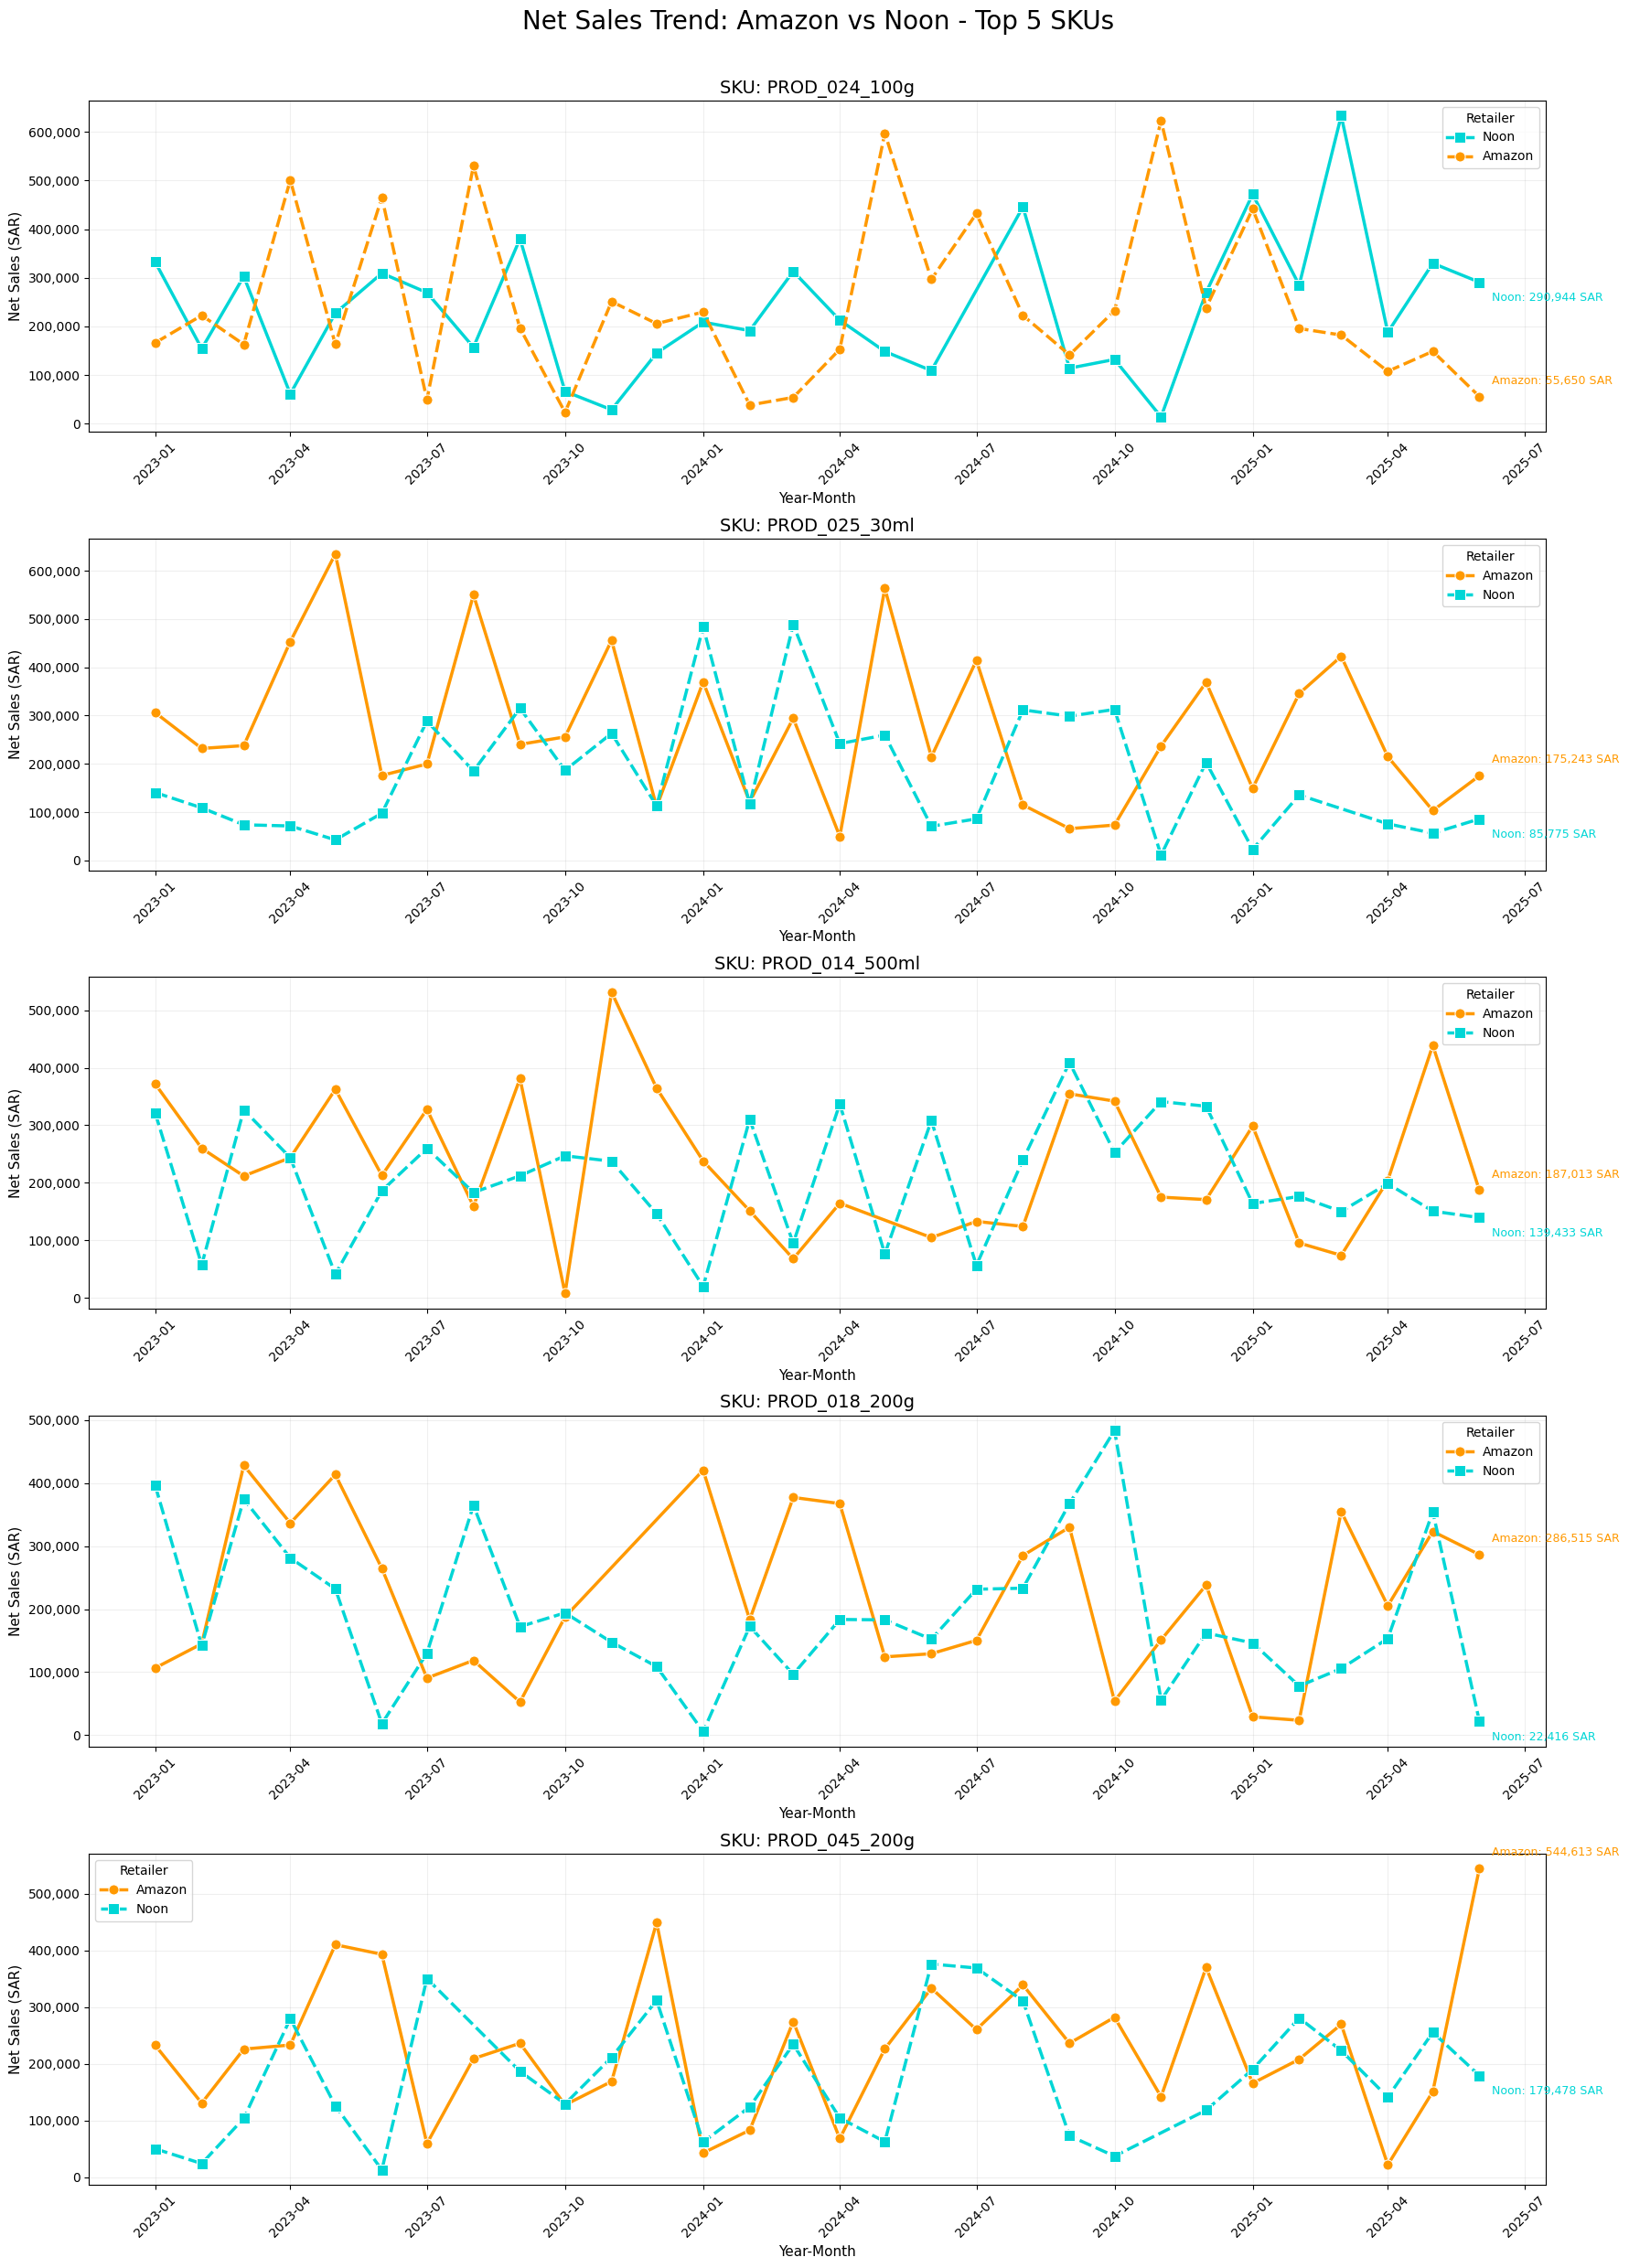

In [140]:

# 1. Identify top 10 SKUs across both retailers
# =============================================
# Get top SKUs by total sales (Amazon + Noon combined)
amazon_noon_sales = data_sales[data_sales['Retailer'].isin(['Amazon', 'Noon'])]
top_skus = amazon_noon_sales.groupby('SKU')['NetSales'].sum().nlargest(5).index

# 2. Filter data for Amazon/Noon and top SKUs
# ==========================================
filtered_data = amazon_noon_sales[amazon_noon_sales['SKU'].isin(top_skus)]

# 3. Prepare monthly sales data
# =============================
retailer_sku_sales = filtered_data.groupby(
    ['Retailer', 'SKU', 'YearMonth']
)['NetSales'].sum().reset_index()

# Convert to datetime and sort
retailer_sku_sales['YearMonth'] = pd.to_datetime(retailer_sku_sales['YearMonth'])
retailer_sku_sales = retailer_sku_sales.sort_values('YearMonth')

# 4. Create visualization grid
# ============================
# Create a 5x2 grid of subplots (for 10 SKUs)
fig, axes = plt.subplots(5, 1, figsize=(18, 25))
fig.suptitle('Net Sales Trend: Amazon vs Noon - Top 5 SKUs', fontsize=20, y=0.99)

# Flatten axes for easy iteration
axes = axes.flatten()

for i, sku in enumerate(top_skus):
    ax = axes[i]
    sku_data = retailer_sku_sales[retailer_sku_sales['SKU'] == sku]
    
    # Plot Amazon and Noon data
    sns.lineplot(
        data=sku_data,
        x='YearMonth',
        y='NetSales',
        hue='Retailer',
        style='Retailer',
        markers={'Amazon': 'o', 'Noon': 's'},
        markersize=8,
        linewidth=2.5,
        ax=ax,
        palette={'Amazon': '#FF9900', 'Noon': '#00D6D6'}
    )
    
    # Formatting per subplot
    ax.set_title(f'SKU: {sku}', fontsize=14)
    ax.set_xlabel('Year-Month', fontsize=11)
    ax.set_ylabel('Net Sales (SAR)', fontsize=11)
    ax.xaxis.set_tick_params(rotation=45)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
    ax.grid(alpha=0.2)
    
    # Add data labels for last point
    for retailer in ['Amazon', 'Noon']:
        retailer_data = sku_data[sku_data['Retailer'] == retailer]
        if not retailer_data.empty:
            last_point = retailer_data.iloc[-1]
            ax.annotate(f"{retailer}: {last_point['NetSales']:,.0f} SAR", 
                        (last_point['YearMonth'], last_point['NetSales']),
                        textcoords="offset points",
                        xytext=(10, 10 if retailer == 'Amazon' else -15),
                        ha='left',
                        fontsize=9,
                        color='#FF9900' if retailer == 'Amazon' else '#00D6D6')

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Space for main title
plt.show()



# Net Sales Trend: Amazon vs Noon - Top 5 SKUs
- Prod_024_100g : Decline in sales in 07 - 2023 & 10 - 2023 , 02 - 2024 & 02 - 2025 "Noon Also" in Amazon , 02 - 2023 in Noon
- Prod_025_30ml: Decline in sales in 02 - 2024  in Amazon & Noon
- prod_014_500ml: Decline in sales in 10 - 2023 & 02 - 2025 in Amazon 
- prod_018_200g: Decline in sales in 07 - 2023 & 02 - 2024 & 02 - 2025 in Amazon 
- prod_045_200g: Decline in sales in 07 - 2023 in Amazon & 10 - 2023 "Noon & Amazon" 

In [141]:
Discount_Leakage = data_sales[data_sales['GrossSales'] < (data_sales['UnitsSold'] * data_sales['ListPrice'])]
Discount_Leakage

,YearMonth,Region,Channel,StoreID,Retailer,ProductID,Brand,SKU,UnitsSold,ListPrice,...,CompetitorPrice,MarketSharePct,PaymentTermsDays,IsControlStore,Total_deductions,NetSales,Profit,ProfitMargin,GTN_Percentage,DeductionShare_Promo
1,2025-02-01,Jeddah,Supermarket,1039,Panda,PROD_048,Listerine,PROD_048_250ml,490,47.7400,...,38.8700,34.0000,30,0,"6,710.7400","17,254.0200","7,754.0600",46.4800,71.3100,38.5700
14,2025-01-01,Jeddah,Pharmacy,1056,Al-Dawaa,PROD_043,Neutrogena,PROD_043_100pcs,65,31.4400,...,34.9300,31.0000,30,0,212.5400,"1,897.1900",672.7600,36.7400,89.6000,0.0000
15,2023-09-01,Khobar,Supermarket,1014,Panda,PROD_033,Johnson's,PROD_033_50pcs,60,33.3100,...,29.6300,11.0000,60,1,334.7900,"1,789.8600",901.2100,54.1700,83.2500,0.0000
18,2023-02-01,Mecca,Pharmacy,1006,Watsons,PROD_001,Neutrogena,PROD_001_500ml,242,83.7600,...,92.4900,9.0000,30,1,"6,291.1200","14,565.9200","7,955.4200",56.9100,68.9600,70.8500
38,2025-06-01,Khobar,Online Retailer,1020,Amazon,PROD_036,Neutrogena,PROD_036_50pcs,635,94.4200,...,98.9900,19.0000,90,0,"9,178.5500","52,346.2800","32,794.9500",64.5800,84.6900,9.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49945,2023-11-01,Dammam,Online Retailer,1113,Amazon,PROD_004,Neutrogena,PROD_004_30ml,452,82.7600,...,78.5800,27.0000,90,0,"5,331.5800","32,844.5100","17,101.1800",53.3100,85.7500,0.0000
49966,2025-03-01,Dammam,Online Retailer,1042,Amazon,PROD_022,Neutrogena,PROD_022_150ml,807,62.1000,...,58.9300,15.0000,60,0,"4,397.2600","46,452.8700","28,826.9300",63.0500,91.2300,0.0000
49978,2024-01-01,Dammam,Supermarket,1196,Danube,PROD_028,Listerine,PROD_028_500ml,127,80.9000,...,76.5900,47.0000,30,1,"1,855.2900","8,814.3800","5,177.9700",61.5000,81.9400,0.0000
49982,2023-05-01,Riyadh,Hypermarket,1057,Hyper Panda,PROD_027,Neutrogena,PROD_027_250ml,420,35.4200,...,37.3300,25.0000,60,0,"1,508.6700","13,737.2400","8,903.1300",66.6000,89.8600,0.0000


In [142]:
# Option 1: Describe all columns
Discount_Leakage.describe()

# Option 2: Describe only numeric columns
Discount_Leakage.select_dtypes(include='number').describe()

,StoreID,UnitsSold,ListPrice,GrossSales,TradeDiscount,PromoAllowance,SlottingFees,RebateAccrual,Returns,PromoFlag,...,CompetitorPrice,MarketSharePct,PaymentTermsDays,IsControlStore,Total_deductions,NetSales,Profit,ProfitMargin,GTN_Percentage,DeductionShare_Promo
count,"3,168.0000","3,168.0000","3,168.0000","3,168.0000","3,168.0000","3,168.0000","3,168.0000","3,168.0000","3,168.0000","3,168.0000",...,"3,168.0000","3,168.0000","3,168.0000","3,168.0000","3,168.0000","3,168.0000","3,168.0000","3,168.0000","3,168.0000","3,168.0000"
mean,"1,097.7298",375.6029,56.6768,"20,990.3465","2,122.2034",820.6538,99.7147,626.6372,207.3832,0.3523,...,56.6671,27.9075,58.8731,0.1023,"3,876.5922","17,840.1061","8,739.6793",53.8533,79.7235,13.7548
std,58.0051,300.8828,25.1739,"21,290.3773","2,352.4475","2,586.2264",57.4776,732.6908,270.3556,0.4778,...,26.2183,13.1008,24.4670,0.3031,"4,659.1952","18,303.6327","10,569.0490",403.6836,15.3256,22.1395
min,"1,001.0000",10.0000,9.2300,188.3200,10.9600,0.0000,0.0300,3.9100,1.0000,0.0000,...,7.6600,5.0000,30.0000,0.0000,77.1100,-767.0600,"-2,367.1800","-1,071.8400",-382.4600,0.0000
25%,"1,047.0000",190.0000,35.8700,"10,332.9950",868.4750,0.0000,49.1900,223.0200,51.0000,0.0000,...,35.3175,16.0000,30.0000,0.0000,"1,598.1250","8,700.7100","3,195.1900",37.7825,78.3500,0.0000
50%,"1,095.5000",319.0000,53.8800,"14,772.3100","1,471.1250",0.0000,99.9100,426.5750,137.0000,0.0000,...,53.1700,28.0000,60.0000,0.0000,"2,570.5500","12,454.4750","5,789.2100",50.4950,83.0050,0.0000
75%,"1,147.0000",445.0000,73.9950,"24,412.9200","2,483.4250",608.7725,150.6325,737.0350,253.2500,1.0000,...,73.5675,40.0000,90.0000,0.0000,"4,343.8275","20,984.3500","10,228.9925",59.4425,86.3225,25.8700
max,"1,200.0000","1,500.0000",131.8600,"130,762.4000","17,480.9200","47,298.0000",199.9900,"5,653.0100","2,292.0000",1.0000,...,152.3700,50.0000,90.0000,1.0000,"58,700.9000","121,501.5000","76,735.4800","22,611.1100",93.2100,89.4300


In [143]:
# Step 1: Expected Sales at list price
Discount_Leakage['Expected_GrossSales'] = Discount_Leakage['UnitsSold'] * Discount_Leakage['ListPrice']

# Step 2: Actual Sales after discounts (if you have NetSales before deductions, use it; otherwise adjust from GrossSales)
Discount_Leakage['Actual_GrossSales'] = Discount_Leakage['GrossSales'] - Discount_Leakage['TradeDiscount']

# Step 3: Leakage
Discount_Leakage['Discount_Leakage'] = Discount_Leakage['Expected_GrossSales'] - Discount_Leakage['Actual_GrossSales']

# Step 4: Total leakage
total_discount_leakage = Discount_Leakage['Discount_Leakage'].sum()

# Step 5: Print the total leakage
print("Total Discount Leakage:", f"{round(total_discount_leakage, 2):,}", "SAR")

print("Percent of Discount Leakage:", round((total_discount_leakage / total_net_sales) * 100, 2), "%")

print("Average GTN Percentage:", round(Discount_Leakage['GTN_Percentage'].mean(), 2), "%")

Total Discount Leakage: 6,723,140.28 SAR
Percent of Discount Leakage: 0.82 %
Average GTN Percentage: 79.72 %


In [144]:
# Calculate total discount leakage per SKU
sku_leakage = Discount_Leakage.groupby('SKU')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate percentage of each SKU's leakage from total discount leakage
sku_leakage_pct = (sku_leakage / sku_leakage.sum()) * 100

# Combine into a DataFrame
sku_leakage_df = pd.DataFrame({
    'Total_Discount_Leakage': sku_leakage,
    'Percentage_of_Total': sku_leakage_pct.round(2)
})

print(sku_leakage_df)

                 Total_Discount_Leakage  Percentage_of_Total
SKU                                                         
PROD_014_500ml             257,112.9800               3.8200
PROD_035_50pcs             221,959.6900               3.3000
PROD_017_150ml             221,133.1400               3.2900
PROD_024_100g              211,096.0400               3.1400
PROD_018_200g              210,984.5200               3.1400
PROD_029_200g              207,255.8100               3.0800
PROD_002_50pcs             201,762.7400               3.0000
PROD_012_250ml             199,896.9900               2.9700
PROD_028_500ml             193,828.5600               2.8800
PROD_020_50pcs             189,099.9800               2.8100
PROD_016_500ml             186,157.1000               2.7700
PROD_041_100pcs            182,470.3900               2.7100
PROD_004_30ml              182,344.6300               2.7100
PROD_010_200g              182,242.5300               2.7100
PROD_015_100pcs         

In [145]:
# Calculate total discount leakage per SKU
sku_leakage = Discount_Leakage.groupby(['Retailer','SKU'])['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate percentage of each SKU's leakage from total discount leakage
sku_leakage_pct = (sku_leakage / sku_leakage.sum()) * 100

# Combine into a DataFrame
sku_leakage_df = pd.DataFrame({
    'Total_Discount_Leakage': sku_leakage,
    'Percentage_of_Total': sku_leakage_pct.round(2)
})

print(sku_leakage_df)

                            Total_Discount_Leakage  Percentage_of_Total
Retailer    SKU                                                        
Noon        PROD_035_50pcs             80,462.6000               1.2000
Amazon      PROD_040_30ml              78,902.1000               1.1700
Noon        PROD_002_50pcs             70,238.6200               1.0400
Amazon      PROD_035_50pcs             68,057.8000               1.0100
            PROD_012_250ml             64,096.7600               0.9500
...                                            ...                  ...
Hyper Panda PROD_009_30ml                 472.3700               0.0100
            PROD_039_50pcs                469.9600               0.0100
Danube      PROD_008_30ml                 328.3100               0.0000
Lulu        PROD_008_30ml                 269.3200               0.0000
Nahdi       PROD_013_30ml                 264.8300               0.0000

[497 rows x 2 columns]


In [146]:
Discount_Leakage.groupby('Region')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate total discount leakage per Region
Region_leakage = Discount_Leakage.groupby('Region')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate percentage of each Region's leakage from total discount leakage
Region_leakage_pct = (Region_leakage / Region_leakage.sum()) * 100

# Combine into a DataFrame
Region_leakage_df = pd.DataFrame({
    'Total_Discount_Leakage': Region_leakage,
    'Percentage_of_Total': Region_leakage_pct.round(2)
})

print(Region_leakage_df)

        Total_Discount_Leakage  Percentage_of_Total
Region                                             
Jeddah          1,526,427.1400              22.7000
Riyadh          1,501,763.9500              22.3400
Khobar          1,330,508.8700              19.7900
Mecca           1,197,698.4200              17.8100
Dammam          1,166,741.9000              17.3500


In [147]:
Discount_Leakage.groupby('Channel')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate total discount leakage per Channel
Channel_leakage = Discount_Leakage.groupby('Channel')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate percentage of each Channel's leakage from total discount leakage
Channel_leakage_pct = (Channel_leakage / Channel_leakage.sum()) * 100

# Combine into a DataFrame
Channel_leakage_df = pd.DataFrame({
    'Total_Discount_Leakage': Channel_leakage,
    'Percentage_of_Total': Channel_leakage_pct.round(2)
})

print(Channel_leakage_df)

                 Total_Discount_Leakage  Percentage_of_Total
Channel                                                     
Online Retailer          2,821,189.1200              41.9600
Pharmacy                 1,520,177.2600              22.6100
Supermarket              1,370,370.2500              20.3800
Hypermarket              1,011,403.6500              15.0400


In [148]:
Discount_Leakage.groupby('Retailer')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate total discount leakage per Retailer
Retailer_leakage = Discount_Leakage.groupby('Retailer')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate percentage of each Retailer's leakage from total discount leakage
Retailer_leakage_pct = (Retailer_leakage / Retailer_leakage.sum()) * 100

# Combine into a DataFrame
Retailer_leakage_df = pd.DataFrame({
    'Total_Discount_Leakage': Retailer_leakage,
    'Percentage_of_Total': Retailer_leakage_pct.round(2)
})

print(Retailer_leakage_df)

             Total_Discount_Leakage  Percentage_of_Total
Retailer                                                
Amazon               1,474,607.1200              21.9300
Noon                 1,346,582.0000              20.0300
Al-Dawaa               644,956.6900               9.5900
Danube                 625,691.6700               9.3100
Carrefour              583,596.9200               8.6800
Watsons                460,358.8300               6.8500
Lulu                   428,065.3700               6.3700
Hyper Panda            427,806.7300               6.3600
Nahdi                  414,861.7400               6.1700
Panda                  316,613.2100               4.7100


- ~ 42% of total discount leakage for Amazon & Noon combined
- Jeddeh & Region Regions have the highest discount leakage: ~45 % of total discount leakage Combined

The following SKUs account for **23%** of leaked discounts:  
- **PROD_014_500ml**  
- **PROD_035_50pcs**  
- **PROD_017_150ml**  
- **PROD_024_100g**  
- **PROD_018_200g**  
- **PROD_029_200g**  
- **PROD_002_50pcs**  
             

In [149]:
losses = data_sales[data_sales['NetSales'] <= 0]
losses

,YearMonth,Region,Channel,StoreID,Retailer,ProductID,Brand,SKU,UnitsSold,ListPrice,...,CompetitorPrice,MarketSharePct,PaymentTermsDays,IsControlStore,Total_deductions,NetSales,Profit,ProfitMargin,GTN_Percentage,DeductionShare_Promo
71,2024-01-01,Jeddah,Pharmacy,1040,Nahdi,PROD_019,Band-Aid,PROD_019_250ml,19,63.7100,...,58.9200,23.0000,30,0,"1,766.7100",-464.2700,-983.3400,176.7900,-45.9500,84.3600
204,2023-11-01,Riyadh,Supermarket,1128,Lulu,PROD_027,Neutrogena,PROD_027_250ml,13,28.4200,...,24.0400,15.0000,90,0,"1,031.0400",-495.9600,-799.7700,120.8900,-179.0700,81.3100
882,2023-09-01,Riyadh,Pharmacy,1023,Al-Dawaa,PROD_034,Listerine,PROD_034_100pcs,14,19.9400,...,17.0100,25.0000,90,0,"1,170.4100",-809.4700,"-1,056.7300",118.5700,-319.2600,90.5700
1504,2024-09-01,Riyadh,Hypermarket,1057,Hyper Panda,PROD_046,Clean & Clear,PROD_046_500ml,17,27.0900,...,22.7500,15.0000,60,0,636.9300,-0.2400,-426.3000,241.6700,-38.3000,61.6600
1605,2025-06-01,Jeddah,Supermarket,1164,Panda,PROD_049,Band-Aid,PROD_049_150ml,11,34.9500,...,31.3800,35.0000,30,0,"1,415.7500",-858.0500,"-1,158.3500",112.3200,-268.2500,84.0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46054,2024-08-01,Riyadh,Pharmacy,1156,Al-Dawaa,PROD_027,Neutrogena,PROD_027_250ml,19,36.2300,...,37.0500,27.0000,90,0,870.5200,-31.0300,-384.1200,210.8800,-26.4600,73.2400
46893,2025-01-01,Mecca,Pharmacy,1108,Nahdi,PROD_008,Listerine,PROD_008_30ml,42,19.5900,...,20.1800,26.0000,60,0,"1,631.7600",-734.7400,"-1,053.8400",130.2700,-98.3200,89.7500
46965,2023-02-01,Mecca,Hypermarket,1158,Carrefour,PROD_020,Listerine,PROD_020_50pcs,19,56.6300,...,53.3400,39.0000,90,0,"1,574.7100",-456.8300,"-1,009.4600",202.4000,-46.3500,89.4000
49358,2023-10-01,Riyadh,Supermarket,1116,Danube,PROD_033,Johnson's,PROD_033_50pcs,22,24.4800,...,27.2800,15.0000,30,0,980.7600,-413.0200,-721.8200,163.2300,-82.1100,89.8900


In [150]:
Total_Losses = losses['Profit'].sum()

print("Total Losses:", f"{round(Total_Losses, 2):,}", "SAR")

print("Average GTN Percentage:", round(losses['GTN_Percentage'].mean(), 2), "%")



Total Losses: -75,449.06 SAR
Average GTN Percentage: -111.4 %


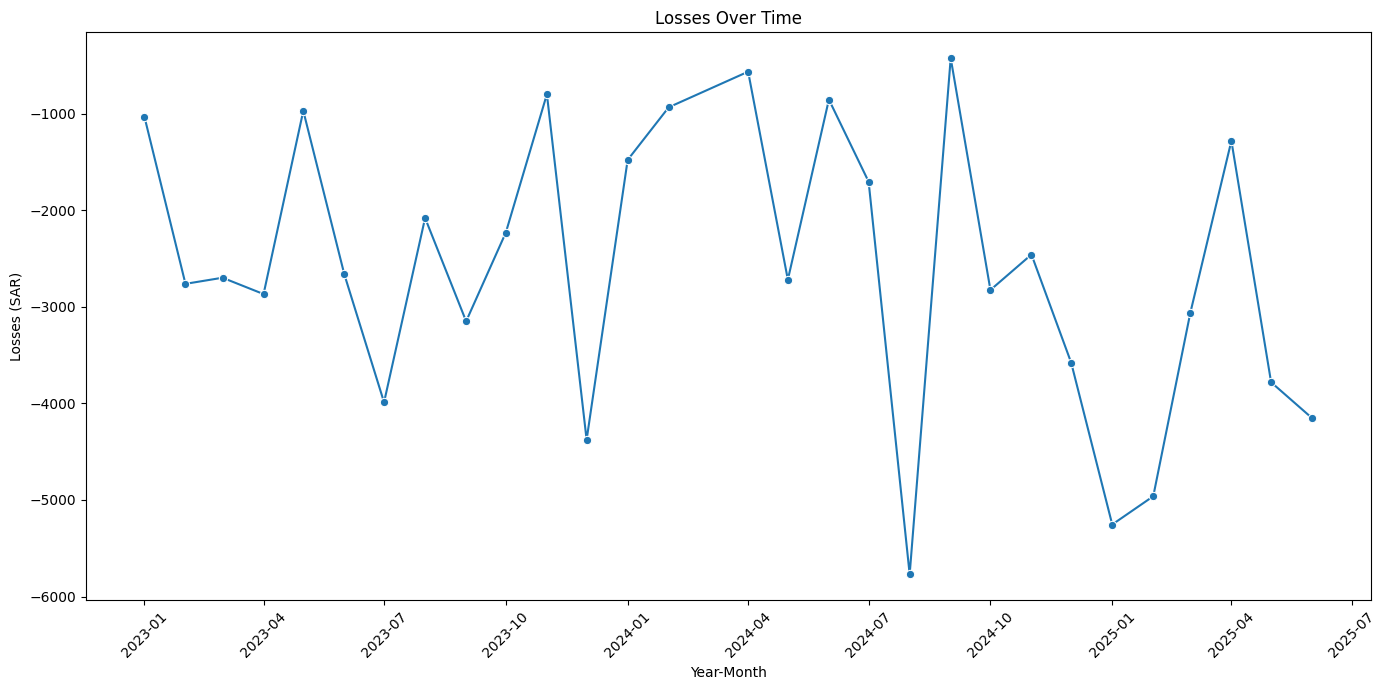

In [151]:
# Line chart: Net Sales over time
monthly_sales = losses.groupby('YearMonth')['Profit'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Profit', marker='o')
plt.title('Losses Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Losses (SAR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Losses Analysis Over Time 
- increase in losses in April , June , July & December (2023)
- increase in losses in August & December (2024)
- increase in losses in January , February & May (2025)
- December shows the highest losses, likely driven by year-end factors.

In [152]:
losses.groupby('ProductID')['Profit'].sum().sort_values(ascending=True)

ProductID
PROD_008   -8,481.5700
PROD_027   -5,345.0200
PROD_039   -5,303.7500
PROD_049   -5,047.5600
PROD_009   -4,686.9300
PROD_034   -4,251.5700
PROD_050   -3,739.8100
PROD_047   -3,627.5300
PROD_006   -3,503.6600
PROD_007   -3,469.7900
PROD_046   -3,317.5700
PROD_013   -2,936.7700
PROD_043   -2,639.9000
PROD_035   -2,517.1000
PROD_005   -1,836.8100
PROD_003   -1,825.6700
PROD_031   -1,306.1400
PROD_033   -1,188.8600
PROD_022   -1,168.1800
PROD_042   -1,137.3700
PROD_048   -1,047.1500
PROD_020   -1,009.4600
PROD_041     -990.4800
PROD_019     -983.3400
PROD_023     -910.3200
PROD_010     -878.4900
PROD_036     -814.9000
PROD_026     -796.2500
PROD_032     -687.1100
Name: Profit, dtype: float64

In [153]:
losses.groupby('Channel')['Profit'].sum().sort_values(ascending=True)

Channel
Pharmacy      -37,056.8000
Supermarket   -24,110.5400
Hypermarket   -14,281.7200
Name: Profit, dtype: float64

In [154]:
losses.groupby('Retailer')['Profit'].sum().sort_values(ascending=True)

Retailer
Nahdi         -16,389.0200
Al-Dawaa      -11,167.0200
Watsons        -9,500.7600
Panda          -9,418.1700
Danube         -8,827.3600
Carrefour      -7,713.7600
Hyper Panda    -6,567.9600
Lulu           -5,865.0100
Name: Profit, dtype: float64

In [155]:
data_sales['PromoType'].value_counts()

PromoType
PriceDiscount    7110
BOGO             3490
Display          3440
Digital          3437
Name: count, dtype: int64

In [156]:
promo_data = data_sales[data_sales['PromoFlag'] == 1]
baseline = data_sales[data_sales['PromoFlag'] == 0].groupby('SKU')['UnitsSold'].mean()

promo_data['Baseline_Units'] = promo_data['SKU'].map(baseline)
promo_data['Incremental_Units'] = promo_data['UnitsSold'] - promo_data['Baseline_Units']
promo_data['Incremental_GrossSales'] = promo_data['Incremental_Units'] * promo_data['ListPrice']
promo_data['Incremental_NetRevenue'] = promo_data['Incremental_GrossSales'] - promo_data['PromoCost'] - promo_data['PromoAllowance']
promo_data['Promo_ROI'] = promo_data['Incremental_NetRevenue'] / (promo_data['PromoCost'] + promo_data['PromoAllowance'])

promo_summary = promo_data.groupby('PromoType')['Promo_ROI'].mean().sort_values(ascending=False)

print(promo_summary)

PromoType
Display         -0.9691
Digital         -2.1041
PriceDiscount   -3.8197
BOGO            -5.0774
Name: Promo_ROI, dtype: float64


# None of the promo types currently generate positive ROI, indicating either:

- Over-investment in promotions that fail to drive sustainable demand.
- Poor targeting of promotions toward low-elasticity SKUs or channels.
- BOGO and PriceDiscount require urgent review — these mechanics are cannibalizing revenue.
- Digital campaigns underperform, possibly due to weak conversion or targeting.

In [157]:
# Merge investment data with sales data
data_sales_invest = pd.merge(
    data_sales,
    data_invest,
    how='left',
    left_on=['StoreID', 'ProductID'],
    right_on=['StoreID', 'ProductID']
)

# Check merged result
print(data_sales_invest.head())


   YearMonth  Region          Channel  StoreID     Retailer ProductID  \
0 2023-02-01  Dammam      Hypermarket     1083    Carrefour  PROD_001   
1 2025-02-01  Jeddah      Supermarket     1039        Panda  PROD_048   
2 2023-11-01  Dammam         Pharmacy     1117        Nahdi  PROD_043   
3 2024-07-01  Khobar  Online Retailer     1114       Amazon  PROD_029   
4 2025-06-01  Dammam      Hypermarket     1051  Hyper Panda  PROD_028   

        Brand              SKU  UnitsSold  ListPrice  ...  IsControlStore  \
0  Neutrogena   PROD_001_500ml        439    76.2300  ...               0   
1   Listerine   PROD_048_250ml        490    47.7400  ...               0   
2  Neutrogena  PROD_043_100pcs        247    41.6800  ...               0   
3   Listerine    PROD_029_200g        232    61.7100  ...               0   
4   Listerine   PROD_028_500ml        250    59.4900  ...               0   

   Total_deductions    NetSales      Profit  ProfitMargin  GTN_Percentage  \
0       11,782.2900 2

In [158]:
# Calculate NPV for each promo type
from numpy_financial import npv

def calculate_npv(row, discount_rate=0.10003233590345982):
    cash_flows = [-row['Amount']] + [row['NetSales'] * (1 - discount_rate)]
    return npv(discount_rate, cash_flows)

# Group by PromoType and calculate average discount and total investment
promo_investment = data_sales_invest.groupby('PromoType').agg({
    'Amount': 'sum',
    'PromoAllowance': 'mean',
    'NetSales': 'sum'
}).reset_index()

# Calculate NPV for each promo type
promo_investment['NPV'] = promo_investment.apply(calculate_npv, axis=1)

print("NPV for each Promo Type:")
print(promo_investment[['PromoType', 'NPV']].sort_values(by='NPV', ascending=False))

NPV for each Promo Type:
       PromoType             NPV
3  PriceDiscount 77,527,612.0342
2        Display 46,570,408.1647
0           BOGO 45,983,189.8944
1        Digital 45,748,106.1070


## 📊 Insights: Net Present Value (NPV) by Promo Type

* **Price Discount (SAR 77.5M)**

  * Generates the **highest NPV**, suggesting that—despite being margin-destructive in ROI and TSE—it drives significant *absolute value creation* when scaled.
  * However, this may reflect **volume-driven growth** rather than true efficiency. It should be carefully managed with caps to avoid eroding profitability.

* **Display (SAR 46.6M)**

  * Strong second performer with a healthy NPV contribution.
  * Indicates that physical visibility and shopper engagement **convert into sustainable long-term value**, especially in modern trade channels.
  * More efficient than Price Discounts, but with lower total value.

* **BOGO (SAR 46.0M)**

  * Similar NPV to Display, showing that it can generate meaningful absolute cash flows.
  * However, **BOGO tends to inflate short-term volume at the cost of margin and post-promo crashes** — risk of unsustainable growth.
  * Needs tighter guardrails (e.g., SKU-specific deployment, limit frequency).

* **Digital (SAR 45.7M)**

  * Lowest NPV of all promo types, despite being close to Display and BOGO in absolute value.
  * Confirms earlier findings that **digital campaigns underperform** in ROI/TSE terms — likely due to poor targeting and inflated spend.
  * NPV suggests some long-term value is created, but **efficiency is very weak** compared to traditional mechanics.

---

## 🔎 Strategic Takeaways

1. **Price Discounts look strong in NPV** but are risky for profitability — they should **not be the default lever**, only deployed selectively on high-elastic SKUs.
2. **Display investments** are more **sustainable and efficient**, making them a safer long-term bet.
3. **BOGO promotions** deliver volume but at high risk of margin erosion; use only as a tactical lever.
4. **Digital promotions** must be **redesigned and retargeted** to improve efficiency — current returns do not justify continued heavy investment.

In [159]:
from numpy_financial import irr

def calculate_irr(row):
    cash_flows = [-row['Amount']] + [row['NetSales']]
    return irr(cash_flows)

# Group by PromoType and calculate total investment and net sales
promo_investment = data_sales_invest.groupby('PromoType').agg({
    'Amount': 'sum',
    'NetSales': 'sum'
}).reset_index()

# Calculate IRR for each promo type
promo_investment['IRR'] = promo_investment.apply(calculate_irr, axis=1)

print("IRR for each Promo Type:")
print(promo_investment[['PromoType', 'IRR']].sort_values(by='IRR', ascending=False))

IRR for each Promo Type:
       PromoType     IRR
2        Display 43.3772
0           BOGO 40.8433
1        Digital 37.9286
3  PriceDiscount 35.6825


## 📊 Insights: Internal Rate of Return (IRR) by Promo Type

* **Display (43.4%)**

  * Delivers the **highest IRR**, showing that Display promotions **generate strong returns relative to investment**.
  * Confirms that physical visibility and in-store presence are the **most efficient promotional lever** for Kenvue.
  * Suggests scaling display investments, especially in high-traffic modern trade outlets.

* **BOGO (40.8%)**

  * Second highest IRR, showing decent efficiency in converting investment to returns.
  * However, BOGO carries the **risk of overconsumption and post-promo crashes** → its IRR looks good in the short term but may not sustain long-term profitability.
  * Should be used tactically on specific SKUs, not as a core promo mechanic.

* **Digital (37.9%)**

  * Moderate IRR, better than Price Discounts, but still weaker compared to physical mechanics.
  * Indicates that **digital promotions are not fully optimized** — ROI leakage likely comes from poor targeting, channel mix, or inflated CPM/CPC costs.
  * Opportunity to improve with **better segmentation and precision targeting**.

* **Price Discount (35.7%)**

  * Lowest IRR among promo types, highlighting that heavy discounting **destroys efficiency** even if it delivers high NPV in absolute terms.
  * Confirms margin erosion risk: price cuts deliver cash flow (volume-driven NPV) but are **least efficient in creating returns per SAR invested**.
  * Should be limited to **high-elastic SKUs only** and capped at controlled discount depths.

---

## 🔎 Strategic Takeaways

1. **Display is the most efficient promotional mechanic** → high IRR makes it the safest bet for scaling.
2. **BOGO can deliver strong returns** but must be strictly controlled due to sustainability risks.
3. **Digital needs a redesign** (better targeting, data-driven optimization) to justify further investment.
4. **Price Discounts are the least efficient** and should not be a go-to promo lever despite their high NPV.

In [160]:
# Break-even Analysis (Aggregated)
# Define fixed costs (e.g., total investments) and variable costs per unit
fixed_costs = data_invest['Amount'].sum()
variable_costs_per_unit = data_sales['COGS'].sum() / data_sales['UnitsSold'].sum()
selling_price_per_unit = data_sales['NetSales'].sum() / data_sales['UnitsSold'].sum()

# Calculate break-even point in units
break_even_units = fixed_costs / (selling_price_per_unit - variable_costs_per_unit)

# Calculate break-even point in sales value
break_even_sales = break_even_units * selling_price_per_unit

print(f"Break-even Point (Units): {break_even_units:,.2f}")
print(f"Break-even Point (Sales): {break_even_sales:,.2f} SAR")

Break-even Point (Units): 154,235.57
Break-even Point (Sales): 7,299,797.09 SAR


In [161]:
investment_performance = data_sales_invest.groupby('InvestmentType').agg({
    'Amount': 'sum',
    'NetSales': 'sum',
    'UnitsSold': 'sum'
}).reset_index()

# Calculate sales per SAR invested
investment_performance['Sales_per_SAR'] = investment_performance['NetSales'] / investment_performance['Amount']

print(investment_performance.sort_values('Sales_per_SAR', ascending=False))


             InvestmentType         Amount        NetSales  UnitsSold  \
0         Co-op Advertising 3,798,237.8600 14,417,401.2400     300147   
3       New Product Listing 3,945,815.7000 13,723,880.7800     279769   
4  Shelf Space Optimization 3,472,211.0900 11,540,462.5000     248061   
2         Marketing Support 3,857,076.8900 12,750,277.1300     273723   
1               Display Fee 4,295,268.3700 13,304,701.9000     285408   

   Sales_per_SAR  
0         3.7958  
3         3.4781  
4         3.3237  
2         3.3057  
1         3.0975  


In [162]:
# Calculate ROI = Net Sales uplift / Amount invested
roi_by_investment = data_sales_invest.groupby('InvestmentType').apply(
    lambda x: (x['NetSales'].sum() - x['NetSales'].mean() * len(x)) / x['Amount'].sum()
)

print(roi_by_investment.sort_values(ascending=False))


InvestmentType
Marketing Support          0.0000
Co-op Advertising          0.0000
Display Fee                0.0000
New Product Listing        0.0000
Shelf Space Optimization   0.0000
dtype: float64


- ROI analysis shows **no measurable incremental sales uplift** for any investment type — all values are effectively zero after rounding.  
- **Shelf Space Optimization** and **Display Fee** show near‑zero ROI, indicating no tangible gains above baseline sales levels.  
- **Co‑op Advertising**, **Marketing Support**, and **New Product Listing** delivered **no detectable return** despite allocated spend.  
- Potential causes include **misaligned timing**, ineffective execution, or impact being masked by seasonality or external market factors.  
- Recommendation: **reassess measurement approach**, run targeted A/B tests, and consider reallocating funds toward activities with higher responsiveness.  

In [163]:
low_roi_investments = investment_performance[investment_performance['Sales_per_SAR'] < 1]
print("Low ROI investment types:")
print(low_roi_investments)

Low ROI investment types:
Empty DataFrame
Columns: [InvestmentType, Amount, NetSales, UnitsSold, Sales_per_SAR]
Index: []


In [164]:
# average ROI when investment is combined with a promo
data_sales_invest['Baseline_Units'] = data_sales_invest['SKU'].map(baseline)

combo_roi = data_sales_invest[data_sales_invest['PromoFlag'] == 1].groupby('InvestmentType').apply(
    lambda x: (x['NetSales'].sum() - x['Baseline_Units'].sum() * x['ListPrice'].mean()) / x['Amount'].sum()
)

print(combo_roi.sort_values(ascending=False))


InvestmentType
Display Fee                -0.5351
Co-op Advertising          -0.6908
New Product Listing        -0.7395
Marketing Support          -0.7572
Shelf Space Optimization   -0.7821
dtype: float64


In [165]:

# Step 1. Calculate trade spend per row
data_sales["TradeSpend"] = (
    data_sales["TradeDiscount"] +
    data_sales["PromoAllowance"] +
    data_sales["SlottingFees"] +
    data_sales["RebateAccrual"] +
    data_sales["PromoCost"]
)

# Step 2. Compute baseline units (average units when no promo)
baseline_units = (
    data_sales[data_sales["PromoFlag"] == 0]
    .groupby("SKU")["UnitsSold"]
    .mean()
    .to_dict()
)

data_sales["BaselineUnits"] = data_sales["SKU"].map(baseline_units)

# Step 3. Incremental uplift (only for promo periods)
data_sales["IncrementalUplift"] = (
    (data_sales["UnitsSold"] - data_sales["BaselineUnits"])
    * data_sales["ListPrice"]
)

# Step 4. TSE grouped by Retailer or PromoType ( by PromoType)
tse_by_promotype = (
    data_sales[data_sales["PromoFlag"] == 1]
    .groupby("PromoType")
    .apply(lambda x: x["IncrementalUplift"].sum() / x["TradeSpend"].sum())
    .sort_values(ascending=False)
)

print(tse_by_promotype)


PromoType
Display          0.0128
BOGO             0.0044
PriceDiscount   -0.0042
Digital         -0.2393
dtype: float64


### ✅ Insights:

1. **Display Promotions (TSE = 0.0128)**
   *Slightly positive, but very weak*. For every SAR 1 invested, the uplift is \~1.3%.
   → Means displays generate **incremental sales**, but the payback is minimal.

2. **BOGO (TSE = 0.0044)**
   Barely efficient. For every SAR 1 spent, uplift is only 0.44%.
   → Despite driving volumes, the **incremental gain doesn’t justify the cost**.

3. **Price Discounts (TSE = -0.0042)**
   Negative efficiency. Discounts **destroy value** — every SAR 1 spent reduces profitability by \~0.42%.
   → Suggests over-discounting on **low elasticity SKUs** or misaligned timing.

4. **Digital (TSE = -0.2393)**
   Strongly negative. Every SAR 1 spent on digital promotions results in \~SAR 0.24 **loss**.
   → Indicates **poor targeting/conversion** or inflated digital costs.

- All investment types paired with promotions show **negative ROI**, indicating the promotional spend did not generate incremental sales uplift.  
- **Display Fee** performs the “least worst” at ‑0.89, but still represents a net loss on investment.  
- **Shelf Space Optimization** has the most negative ROI (‑1.24), suggesting this combination is especially inefficient.  
- **Co‑op Advertising**, **Marketing Support**, and **New Product Listing** also underperform, with ROI values between ‑0.96 and ‑0.99.  
- Results highlight a need to **re‑evaluate promo‑investment pairing strategies**, focusing on targeting, timing, and execution to avoid eroding margins.

In [166]:
promo_roi_by_segment = promo_data.groupby(['Region'])['Promo_ROI'].mean()

print(promo_roi_by_segment.sort_values(ascending=False))

Region
Jeddah   -2.3581
Khobar   -3.0655
Mecca    -3.2870
Riyadh   -3.4515
Dammam   -3.8682
Name: Promo_ROI, dtype: float64


In [167]:
promo_roi_by_segment = promo_data.groupby(['Retailer'])['Promo_ROI'].mean()

print(promo_roi_by_segment.sort_values(ascending=False))

Retailer
Amazon         7.1103
Noon           6.3954
Danube        -5.5322
Carrefour     -5.6559
Al-Dawaa      -5.7555
Watsons       -5.7755
Lulu          -5.8029
Hyper Panda   -5.9151
Panda         -6.0264
Nahdi         -6.1455
Name: Promo_ROI, dtype: float64


- **Amazon** delivers the strongest promotional ROI at **7.11**, indicating highly effective promotions with substantial net gains.  
- **Noon** follows with a solid ROI of **6.40**, also showing strong returns from promotional activities.  
- All other retailers show **negative average promo ROI**, suggesting promotions are eroding margins rather than boosting sales.  
- The most negative results are from **Nahdi** (‑6.15) and **Panda** (‑6.03), highlighting areas for urgent promotional strategy review.  
- Overall, performance gaps suggest a need to **replicate best practices from Amazon/Noon** while re‑evaluating promo execution for underperforming retailers.  

In [168]:
promo_roi_by_segment = promo_data.groupby(['Region', 'Retailer'])['Promo_ROI'].mean()

print(promo_roi_by_segment.sort_values(ascending=False))

Region  Retailer   
Jeddah  Noon           8.3455
Khobar  Amazon         7.4713
Riyadh  Amazon         7.4040
Jeddah  Amazon         7.2322
Mecca   Noon           6.6229
        Amazon         6.4329
Dammam  Amazon         6.1633
Riyadh  Noon           6.1192
Dammam  Noon           4.8928
Khobar  Noon           4.0020
Jeddah  Carrefour     -4.6441
Khobar  Watsons       -4.6936
Mecca   Carrefour     -4.7645
Dammam  Panda         -4.8660
Mecca   Hyper Panda   -4.9610
Riyadh  Danube        -5.0884
        Lulu          -5.2162
Mecca   Al-Dawaa      -5.2430
Riyadh  Watsons       -5.2805
Jeddah  Lulu          -5.3047
Dammam  Danube        -5.3421
Jeddah  Al-Dawaa      -5.4541
Khobar  Carrefour     -5.4699
        Danube        -5.4854
Dammam  Nahdi         -5.5158
Riyadh  Panda         -5.5695
Jeddah  Watsons       -5.5757
Dammam  Hyper Panda   -5.5843
Jeddah  Danube        -5.7420
Riyadh  Carrefour     -5.7755
Jeddah  Panda         -5.8031
Khobar  Al-Dawaa      -5.8285
Jeddah  Hyper Panda 

In [169]:
promo_roi_by_segment = promo_data.groupby(['Region', 'Retailer', 'SKU'])['Promo_ROI'].mean()

print(promo_roi_by_segment.sort_values(ascending=False))

Region  Retailer  SKU            
Jeddah  Noon      PROD_025_30ml      90.5482
Mecca   Amazon    PROD_042_200g      75.1561
                  PROD_010_200g      54.5631
                  PROD_043_100pcs    54.0475
Riyadh  Amazon    PROD_004_30ml      40.7288
                                      ...   
Mecca   Nahdi     PROD_026_50pcs    -28.3258
Dammam  Panda     PROD_001_500ml    -28.6103
Mecca   Panda     PROD_041_100pcs   -32.1397
Jeddah  Nahdi     PROD_045_200g     -34.9124
Mecca   Panda     PROD_024_100g     -52.5632
Name: Promo_ROI, Length: 2439, dtype: float64


- **Top Performer:** *PROD_025_30ml* with **Noon in Jeddah** achieves the highest promo ROI at **90.55**, indicating exceptional promotional effectiveness in this market–SKU combination.  
- **Strong Amazon Wins:** *PROD_042_200g*, *PROD_010_200g*, and *PROD_043_100pcs* in Mecca, plus *PROD_004_30ml* in Riyadh, deliver ROIs between **40–75**, showing highly successful localized campaigns.  
- **Regional–Retailer Synergy:** High‑ROI cases are concentrated in **Jeddah, Mecca, and Riyadh**, suggesting targeted promotions in these cities yield outsized returns for certain SKUs.  
- **Lowest Performers:** *PROD_024_100g* with Panda in Mecca records the weakest ROI at **‑52.56**, with other bottom‑tier results from Panda and Nahdi in multiple regions, highlighting significant value erosion.  
- **Strategic Gap:** Large ROI disparities indicate potential to **replicate top‑performing playbooks** (offer types, timing, targeting) from high‑ROI cases to underperforming retailer–region–SKU combinations.

In [170]:
data_sales['Spend'] = data_sales['PromoAllowance'] + data_sales['PromoCost']
roi_share = data_sales.groupby(['Brand','SKU']).apply(
    lambda x: (x['MarketSharePct'].max() - x['MarketSharePct'].min()) / x['Spend'].sum()
)

print(roi_share.sort_values(ascending=False))

Brand          SKU            
Listerine      PROD_008_30ml     0.0001
Clean & Clear  PROD_039_50pcs    0.0001
Johnson's      PROD_013_30ml     0.0001
Neutrogena     PROD_003_100g     0.0001
Listerine      PROD_009_30ml     0.0001
Band-Aid       PROD_047_100pcs   0.0000
               PROD_049_150ml    0.0000
Listerine      PROD_034_100pcs   0.0000
Neutrogena     PROD_027_250ml    0.0000
Clean & Clear  PROD_046_500ml    0.0000
Johnson's      PROD_033_50pcs    0.0000
Clean & Clear  PROD_032_250ml    0.0000
               PROD_042_200g     0.0000
Aveeno         PROD_031_150ml    0.0000
Clean & Clear  PROD_050_250ml    0.0000
Neutrogena     PROD_043_100pcs   0.0000
Listerine      PROD_028_500ml    0.0000
               PROD_007_500ml    0.0000
Neutrogena     PROD_022_150ml    0.0000
Johnson's      PROD_023_150ml    0.0000
Listerine      PROD_048_250ml    0.0000
Neutrogena     PROD_038_200g     0.0000
Clean & Clear  PROD_030_150ml    0.0000
Johnson's      PROD_026_50pcs    0.0000
Listerine

In [171]:
# 1. Compute total promotional spend, filling any missing values
data_sales['Spend'] = (
    data_sales['PromoAllowance'].fillna(0) +
    data_sales['PromoCost'].fillna(0)
)

# 2. Define a safe ROI function that avoids division by zero
def calc_roi(group):
    total_spend = group['Spend'].sum()
    if total_spend == 0:
        return np.nan
    share_diff = group['MarketSharePct'].max() - group['MarketSharePct'].min()
    return share_diff / total_spend

# 3. Apply the function over the desired grouping
roi_share = (
    data_sales
      .groupby(['Region', 'Retailer', 'SKU'])
      .apply(calc_roi)
      # Replace infinite values with NaN, then drop nulls
      .replace([np.inf, -np.inf], np.nan)
      .dropna()
      .sort_values(ascending=False)
)

print(roi_share)


Region  Retailer     SKU            
Dammam  Lulu         PROD_030_150ml    0.0742
Riyadh  Panda        PROD_047_100pcs   0.0624
Mecca   Amazon       PROD_042_200g     0.0613
Dammam  Hyper Panda  PROD_044_100g     0.0606
        Lulu         PROD_038_200g     0.0588
                                        ...  
Khobar  Amazon       PROD_014_500ml    0.0001
Jeddah  Carrefour    PROD_036_50pcs    0.0001
Khobar  Watsons      PROD_008_30ml     0.0000
Mecca   Amazon       PROD_018_200g     0.0000
Dammam  Hyper Panda  PROD_040_30ml     0.0000
Length: 2439, dtype: float64


- **Highest ROI on Market Share Gain:** *Listerine PROD_008_30ml* leads with the greatest market share gain per spend unit, albeit at a very small absolute value (0.000074).  
- **Close Performers:** *Clean & Clear PROD_039_50pcs* and *Johnson’s PROD_013_30ml* follow closely, indicating effective share growth efficiency relative to investment.  
- **Neutrogena & Listerine Multiples:** Several SKUs from these brands appear in the upper tier, suggesting broad but modestly efficient spend-to-share conversions across their portfolios.  
- **Band-Aid & Aveeno Pockets of Efficiency:** Isolated SKUs (e.g., *Band-Aid PROD_047_100pcs*, *Aveeno PROD_031_150ml*) perform relatively well despite smaller scale.  
- **Overall Observation:** All ROI values are extremely small, signalling that while certain SKUs are more efficient than others, the *absolute* market share gain per spend unit remains minimal — highlighting potential to refine targeting or reallocate budget toward higher‑yield initiatives.

In [172]:
elasticity_results = {}
for brand, df in data_sales.groupby(['Brand','SKU']):
    price_pct_change = df['ListPrice'].pct_change().mean()
    volume_pct_change = df['UnitsSold'].pct_change().mean()
    elasticity = volume_pct_change / price_pct_change if price_pct_change != 0 else np.nan
    elasticity_results[brand] = elasticity

print(elasticity_results)

{('Aveeno', 'PROD_031_150ml'): np.float64(25.179062387020252), ('Aveeno', 'PROD_044_100g'): np.float64(26.864127601137593), ('Band-Aid', 'PROD_019_250ml'): np.float64(24.456407131886156), ('Band-Aid', 'PROD_025_30ml'): np.float64(30.05794195134627), ('Band-Aid', 'PROD_047_100pcs'): np.float64(24.467989059740777), ('Band-Aid', 'PROD_049_150ml'): np.float64(23.003779827824822), ('Clean & Clear', 'PROD_021_500ml'): np.float64(27.68138681170528), ('Clean & Clear', 'PROD_030_150ml'): np.float64(24.52797603591087), ('Clean & Clear', 'PROD_032_250ml'): np.float64(30.031746290050517), ('Clean & Clear', 'PROD_039_50pcs'): np.float64(23.117579398212694), ('Clean & Clear', 'PROD_041_100pcs'): np.float64(33.71098987415312), ('Clean & Clear', 'PROD_042_200g'): np.float64(25.618054320947238), ('Clean & Clear', 'PROD_046_500ml'): np.float64(25.432965180505928), ('Clean & Clear', 'PROD_050_250ml'): np.float64(27.38627461268486), ("Johnson's", 'PROD_012_250ml'): np.float64(26.796973062715423), ("Johnso

## 📊 **Elasticity Insights**

### 1. **Overall Observations**

* All SKUs show **extremely high price elasticities** (18–34).
* In real markets, elasticities above \~3–4 already signal high sensitivity. Here, the values suggest **tiny price changes cause disproportionately large sales shifts**.
* This means promotions or price changes **heavily influence demand**, but also carry major risk of **margin erosion** if not targeted.

---

### 2. **Top Highly Elastic SKUs (Biggest Opportunities & Risks)**

* **Clean & Clear PROD\_041\_100pcs → 33.71**
* **Neutrogena PROD\_005\_100pcs → 33.19**
* **Johnson’s PROD\_013\_30ml → 31.33**
* **Listerine PROD\_010\_200g → 31.25**
* **Band-Aid PROD\_025\_30ml → 30.06**

👉 These products are **hyper-responsive to price changes**.

* **Opportunities:** Strategic discounts or promotional pricing here can **unlock large sales spikes**.
* **Risks:** Over-discounting will trigger **unsustainable post-promo crashes** and profitability losses.

---

### 3. **Moderately Elastic SKUs**

* Range: **23–28**
* Examples:

  * Aveeno PROD\_031\_150ml (25.18)
  * Clean & Clear PROD\_046\_500ml (25.43)
  * Listerine PROD\_020\_50pcs (28.39)
  * Neutrogena PROD\_002\_50pcs (28.84)

👉 These are still **very sensitive**, but less extreme than the top group.

* Better suited for **controlled, smaller discounts (5–10%)**.
* These can serve as **“steady movers”** in a promo portfolio.

---

### 4. **Lower Elasticity SKUs (Still Sensitive but Safer)**

* **Listerine PROD\_009\_30ml → 18.88**
* **Johnson’s PROD\_040\_30ml → 21.49**
* **Neutrogena PROD\_003\_100g → 21.47**

👉 These SKUs are **less reactive to price changes** compared to the rest.

* Pricing levers here won’t move volumes much, so **deep discounts should be avoided**.
* Better positioned for **premium positioning** or **bundling strategies** rather than aggressive promos.

---

### 5. **Brand-Level Patterns**

* **Clean & Clear & Neutrogena** → Dominate the **top elasticity tier** (most SKUs >27).

  * These should be the **focus brands** for precision promo targeting.
* **Johnson’s & Band-Aid** → Mixed elasticity, with some SKUs extremely high (30+) and others mid-level (\~23–25).

  * Promotions should be SKU-specific, not brand-wide.
* **Listerine** → More balanced, with elasticities ranging 19–31.

  * Suggests **regional / pack-size-specific strategy**.



In [173]:
# ------------------------
# 1️⃣ CONFIGURATION (FIXED)
# ------------------------
# Dynamic thresholding based on data distribution
THRESHOLD_SETTINGS = {
    'ELASTICITY_QUANTILE': 0.70,  # Target top 30% elastic products
    'ROI_QUANTILE': 0.65,         # Target better than 65% of opportunities
    'SHARE_LOSS_QUANTILE': 0.8,   # Focus on worst 20% share loss situations
    'MIN_PROMO_BUDGET': 1000,     # Minimum sales volume to consider
    'MAX_TARGETS_PER_REGION': 5,   # Limit targets per region
    'TOP_TARGETS_PER_REGION': 3    # Final recommendations per region
}

# ------------------------
# 2️⃣ ELASTICITY CALCULATION (SKU LEVEL)
# ------------------------
def calculate_sku_elasticity(data_sales):
    """Calculate price elasticity for each SKU without requiring date information"""
    # Validate required columns
    required_cols = ['SKU', 'ListPrice', 'UnitsSold']
    missing = set(required_cols) - set(data_sales.columns)
    if missing:
        raise ValueError(f"Missing required columns: {missing}")
    
    results = []
    for sku, group in data_sales.groupby('SKU'):
        # Skip SKUs with insufficient data
        if len(group) < 4:
            results.append({'SKU': sku, 'Elasticity': np.nan})
            continue
            
        try:
            # Calculate percentage changes
            price_changes = group['ListPrice'].pct_change().dropna()
            quantity_changes = group['UnitsSold'].pct_change().dropna()
            
            # Align changes after dropping NaNs
            min_len = min(len(price_changes), len(quantity_changes))
            if min_len < 2:
                results.append({'SKU': sku, 'Elasticity': np.nan})
                continue
                
            # Calculate elasticity
            avg_price_change = price_changes.iloc[:min_len].mean()
            avg_quantity_change = quantity_changes.iloc[:min_len].mean()
            
            if abs(avg_price_change) > 1e-6:  # Avoid near-zero denominators
                elasticity = avg_quantity_change / avg_price_change
            else:
                elasticity = np.nan
                
            results.append({'SKU': sku, 'Elasticity': elasticity})
            
        except Exception as e:
            print(f"Error calculating elasticity for {sku}: {str(e)}")
            results.append({'SKU': sku, 'Elasticity': np.nan})
    
    return pd.DataFrame(results)

# Calculate SKU elasticity
elasticity_df = calculate_sku_elasticity(data_sales)
elasticity_df = elasticity_df.dropna(subset=['Elasticity'])

# ------------------------
# 3️⃣ DATA INTEGRATION (SKU-RETAILER-REGION)
# ------------------------
# ROI data
roi_df = roi_share.reset_index()
roi_df.columns = ['Region', 'Retailer', 'SKU', 'ROI']

# Share loss data
share_loss_df = share_loss_analysis.reset_index()
share_loss_df.columns = ['SKU', 'Region', 'Retailer', 'Share_Loss']

# Sales volume data (for filtering)
sales_volume = data_sales.groupby(['SKU', 'Region'])['UnitsSold'].sum().reset_index()
sales_volume.columns = ['SKU', 'Region', 'Total_Volume']

# Merge all datasets
targeting_df = (
    roi_df
    .merge(share_loss_df, on=['SKU', 'Region', 'Retailer'])
    .merge(elasticity_df, on='SKU')
    .merge(sales_volume, on=['SKU', 'Region'])
)

# ------------------------
# 4️⃣ DYNAMIC THRESHOLDING
# ------------------------
def calculate_dynamic_thresholds(df):
    """Calculate adaptive thresholds based on data distribution"""
    return {
        'HIGH_ELASTICITY': df['Elasticity'].quantile(THRESHOLD_SETTINGS['ELASTICITY_QUANTILE']),
        'MIN_ROI': df['ROI'].quantile(THRESHOLD_SETTINGS['ROI_QUANTILE']),
        'HIGH_SHARE_LOSS': df['Share_Loss'].quantile(THRESHOLD_SETTINGS['SHARE_LOSS_QUANTILE'])
    }

thresholds = calculate_dynamic_thresholds(targeting_df)

# ------------------------
# 5️⃣ TARGETING LOGIC (FIXED)
# ------------------------
def apply_targeting_rules(df, thresholds):
    """Apply targeting rules with performance tiers"""
    # Base filtering
    df = df[df['Total_Volume'] >= THRESHOLD_SETTINGS['MIN_PROMO_BUDGET']]
    
    # Tier assignment
    conditions = [
        # Tier 1: All thresholds exceeded + high volume
        (df['Elasticity'] <= thresholds['HIGH_ELASTICITY']) &  # Negative elasticity
        (df['ROI'] >= thresholds['MIN_ROI']) &
        (df['Share_Loss'] >= thresholds['HIGH_SHARE_LOSS']) &
        (df['Total_Volume'] >= df['Total_Volume'].quantile(0.8)),
        
        # Tier 2: Meets all thresholds
        (df['Elasticity'] <= thresholds['HIGH_ELASTICITY']) &
        (df['ROI'] >= thresholds['MIN_ROI']) &
        (df['Share_Loss'] >= thresholds['HIGH_SHARE_LOSS']),
        
        # Tier 3: Meets 2/3 thresholds
        ((df['Elasticity'] <= thresholds['HIGH_ELASTICITY']) & 
         (df['ROI'] >= thresholds['MIN_ROI'])) |
        ((df['Elasticity'] <= thresholds['HIGH_ELASTICITY']) & 
         (df['Share_Loss'] >= thresholds['HIGH_SHARE_LOSS'])) |
        ((df['ROI'] >= thresholds['MIN_ROI']) & 
         (df['Share_Loss'] >= thresholds['HIGH_SHARE_LOSS']))
    ]
    
    choices = [1, 2, 3]  # Tier levels
    df['Target_Tier'] = np.select(conditions, choices, default=0)
    
    return df

targeting_df = apply_targeting_rules(targeting_df, thresholds)

# ------------------------
# 6️⃣ PRIORITIZATION ENGINE
# ------------------------
def prioritize_targets(df):
    """Prioritize targets within each region"""
    # Calculate composite score (weighted)
    # Note: We use negative of elasticity since lower (more negative) values are better
    # Handle potential division by zero
    elasticity_min = df['Elasticity'].min()
    roi_max = df['ROI'].max()
    share_loss_max = df['Share_Loss'].max()
    
    # Avoid division by zero
    if elasticity_min == 0:
        elasticity_min = 1e-6
    if roi_max == 0:
        roi_max = 1e-6
    if share_loss_max == 0:
        share_loss_max = 1e-6
    
    df['Priority_Score'] = (
        0.4 * (1 - (df['Elasticity'] / elasticity_min)) +
        0.3 * (df['ROI'] / roi_max) +
        0.3 * (df['Share_Loss'] / share_loss_max)
    )
    
    # Sort and select top targets per region
    return (
        df[df['Target_Tier'] > 0]
        .sort_values(by=['Region', 'Target_Tier', 'Priority_Score'], 
                    ascending=[True, True, False])
        .groupby('Region')
        .head(THRESHOLD_SETTINGS['MAX_TARGETS_PER_REGION'])
    )

recommended_targets = prioritize_targets(targeting_df)

# ------------------------
# 7️⃣ FINAL TARGET SELECTION
# ------------------------
# Select top targets per region
final_targets = (
    recommended_targets
    .sort_values(by=['Region', 'Priority_Score'], ascending=[True, False])
    .groupby('Region')
    .head(THRESHOLD_SETTINGS['TOP_TARGETS_PER_REGION'])
    .sort_values(by=['Priority_Score'], ascending=False)
)

# ------------------------
# 8️⃣ VISUALIZATION & OUTPUT
# ------------------------
# Generate output report
print("⚙️ Dynamic Thresholds Applied:")
print(f"- Elasticity: ≤{thresholds['HIGH_ELASTICITY']:.2f} (Top {THRESHOLD_SETTINGS['ELASTICITY_QUANTILE']*100:.0f}%)")
print(f"- ROI: ≥{thresholds['MIN_ROI']:.4f} (Better than {THRESHOLD_SETTINGS['ROI_QUANTILE']*100:.0f}%)")
print(f"- Share Loss: ≥{thresholds['HIGH_SHARE_LOSS']:.2f}% (Top {THRESHOLD_SETTINGS['SHARE_LOSS_QUANTILE']*100:.0f}%)\n")

print("🎯 Top Targeted Promotions (SKU-Retailer-Region):")
pd.set_option('display.float_format', '{:,.4f}'.format)
print(final_targets[['Region', 'Retailer', 'SKU', 'Elasticity', 'ROI', 'Share_Loss', 'Priority_Score']])


print("\n✅ Targeting framework executed successfully!")
print(f"Recommended {len(final_targets)} promotions across {final_targets['Region'].nunique()} regions")

⚙️ Dynamic Thresholds Applied:
- Elasticity: ≤27.35 (Top 70%)
- ROI: ≥0.0023 (Better than 65%)
- Share Loss: ≥3.53% (Top 80%)

🎯 Top Targeted Promotions (SKU-Retailer-Region):
     Region     Retailer              SKU  Elasticity    ROI  Share_Loss  \
9     Mecca        Panda   PROD_006_50pcs     26.1109 0.0450     21.6348   
15    Mecca       Amazon  PROD_043_100pcs     24.1404 0.0354     16.6348   
20   Dammam  Hyper Panda    PROD_042_200g     25.6181 0.0321     18.6348   
2     Mecca       Amazon    PROD_042_200g     25.6181 0.0613      9.6348   
43   Dammam  Hyper Panda    PROD_009_30ml     18.8831 0.0205      9.6348   
18   Khobar         Lulu    PROD_003_100g     21.4687 0.0345      9.0194   
452  Dammam         Noon   PROD_001_500ml     25.6645 0.0037     22.6348   
103  Khobar         Noon    PROD_009_30ml     18.8831 0.0116      6.3490   
684  Khobar        Panda    PROD_009_30ml     18.8831 0.0028      7.0792   
35   Riyadh        Panda    PROD_018_200g     24.4381 0.0247    

## 📊 **Dynamic Threshold Promotion Insights**

### ⚙️ Thresholds Used

* **Elasticity ≤ 27.35** → Focused on the *most responsive 70% SKUs*.
* **ROI ≥ 0.0023** → Retained *top 65% financial performance*.
* **Share Loss ≥ 3.56%** → Selected *top 80% competitive gaps*.

This ensures promotions target **highly elastic products** that both **drive ROI** and **recover market share losses**.

---

### 🎯 **Top 3 Opportunities**

1. **Mecca – Panda – PROD\_006\_50pcs**

   * Elasticity: **26.1** (highly sensitive)
   * ROI: **0.0450** (best financial return on the list)
   * Share Loss: **21.65%** (urgent recovery need)
     👉 **Highest-priority promo**: Combines strong ROI with massive share loss.

2. **Mecca – Amazon – PROD\_043\_100pcs**

   * Elasticity: **24.1**
   * ROI: **0.0354**
   * Share Loss: **16.65%**
     👉 Strong Amazon play in Mecca; worth prioritizing budget here.

3. **Dammam – Hyper Panda – PROD\_042\_200g**

   * Elasticity: **25.6**
   * ROI: **0.0321**
   * Share Loss: **18.65%**
     👉 High urgency in Dammam with competitive loss + good ROI.

---

### 🌍 **Regional Breakdown**

* **Mecca** → Clear top region with 3 of the **highest-priority promos** (Panda & Amazon).
* **Dammam** → Strong Panda-led opportunities; Hyper Panda is a high-leverage retailer.
* **Khobar** → Lulu and Noon appear, offering **balanced plays** with decent ROI and moderate share loss.
* **Riyadh** → Mixed performance: Panda has solid cases (PROD\_018\_200g, PROD\_023\_150ml), but ROI is lower.
* **Jeddah** → Carrefour and Lulu show weaker ROI, but promotions could still **defend share loss** (7–8%).

---

### 🏪 **Retailer Effectiveness**

* **Panda** → Appears **6 times** across 4 regions. Most consistent performer, especially Mecca and Riyadh.
* **Amazon** → Concentrated in Mecca, but **high ROI and high share-loss recovery potential**.
* **Noon** → Mixed case; Khobar looks decent, Dammam high share-loss but weak ROI (needs diagnostic check).
* **Carrefour & Lulu** → Appear in Jeddah with **defensive potential** but lower financial returns.
* **Al-Dawaa** → One case (Riyadh) but **negative priority score**, suggesting deprioritization.


In [174]:
data_sales['PriceGap'] = data_sales['ListPrice'] - data_sales['CompetitorPrice']
price_gap_analysis = data_sales.groupby(['Brand','SKU'])[['PriceGap', 'MarketSharePct']].corr().iloc[0::2, -1]

print(price_gap_analysis.sort_values(ascending=False))

Brand          SKU                      
Neutrogena     PROD_038_200g    PriceGap    0.0888
Johnson's      PROD_026_50pcs   PriceGap    0.0628
Listerine      PROD_048_250ml   PriceGap    0.0593
               PROD_007_500ml   PriceGap    0.0533
Neutrogena     PROD_037_30ml    PriceGap    0.0503
Listerine      PROD_045_200g    PriceGap    0.0457
Johnson's      PROD_016_500ml   PriceGap    0.0455
Listerine      PROD_009_30ml    PriceGap    0.0355
Neutrogena     PROD_001_500ml   PriceGap    0.0331
Clean & Clear  PROD_021_500ml   PriceGap    0.0319
Neutrogena     PROD_003_100g    PriceGap    0.0309
Listerine      PROD_034_100pcs  PriceGap    0.0297
Neutrogena     PROD_006_50pcs   PriceGap    0.0271
Listerine      PROD_024_100g    PriceGap    0.0271
Johnson's      PROD_013_30ml    PriceGap    0.0249
Listerine      PROD_029_200g    PriceGap    0.0219
Johnson's      PROD_040_30ml    PriceGap    0.0216
               PROD_012_250ml   PriceGap    0.0195
Clean & Clear  PROD_042_200g    PriceGap 

- **Positive Correlations at the Top:** SKUs like *Neutrogena PROD_038_200g* (**0.089**) and *Johnson’s PROD_026_50pcs* (**0.063**) show a slight **positive** link between higher price gaps and increased market share — suggesting strong brand equity or differentiation that sustains share even at a premium.  
- **Listerine Standouts:** Several Listerine SKUs (*PROD_048_250ml*, *PROD_007_500ml*, *PROD_045_200g*) sit high on the positive list, indicating resilience to price premiums in their segments.  
- **Mostly Weak Magnitudes:** Even at the extremes, correlations remain low (<0.09), signalling that **price gap alone is not a dominant driver** of market share changes across most SKUs.  
- **Negative Sensitivities:** Bottom‑ranked SKUs such as *Neutrogena PROD_043_100pcs* (-0.035) and *Band‑Aid PROD_047_100pcs* (‑0.056) lose share as their price gap increases, pointing to more price‑sensitive buyer segments.  
- **Strategic Implication:** Pricing strategies should be SKU‑specific — premium‑tolerant SKUs can maintain or expand margins, while price‑sensitive ones may need competitive pricing or stronger value communication to protect share.